In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('saved_experiments_2.csv')
print(df.head())

test_voltages=df["Unnamed: 0"].tolist()
print(test_voltages)

   Unnamed: 0    0    1    2    3    4    5    6    7    8  ...  64506  64507  \
0        2.34  168  169  165  168  167  167  166  165  168  ...    169    165   
1        2.35  169  164  169  165  166  168  167  170  169  ...    167    167   
2        2.36  168  166  168  166  170  166  165  168  168  ...    168    167   
3        2.37  168  168  170  170  167  166  169  167  167  ...    167    167   
4        2.38  162  165  169  167  167  165  166  167  167  ...    165    168   

   64508  64509  64510  64511  64512  64513  64514  64515  
0    167    168    167    168    167    166    169    164  
1    166    165    169    163    169    169    169    166  
2    170    161    167    167    166    168    169    170  
3    168    165    167    169    168    163    166    168  
4    167    166    165    166    167    165    170    172  

[5 rows x 64517 columns]
[2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2

173


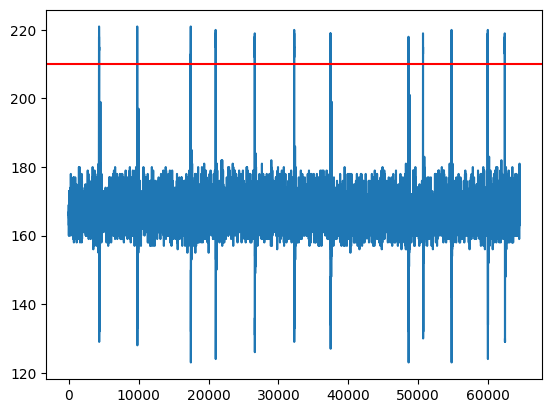

In [3]:
#get into a list from the csv
new_array=[]
for a in range(len(df)):
    new_array.append(df.iloc[a][1:].tolist())

plt.plot(new_array[9])
plt.axhline(y = 210, color = 'r', linestyle = '-')

print(len(new_array))

In [4]:
#clear the data from the waveform asnd turn it into pure impulses
clear_data=[]
for a in new_array:
    tmp=[]
    for b in range(len(a)-1):
        if ((a[b]<210) & (a[b+1]>210)):
            tmp.append(1)
        else:
            tmp.append(0)
    clear_data.append(tmp)

12


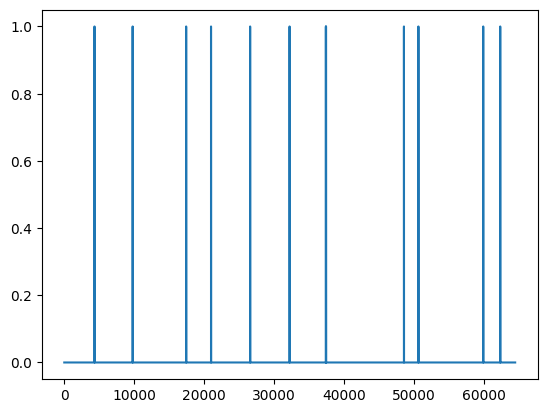

In [7]:
plt.plot(clear_data[9])
print(sum(clear_data[9]))

C:\Users\miles\AppData\Local\Temp\ipykernel_7896\2682292687.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


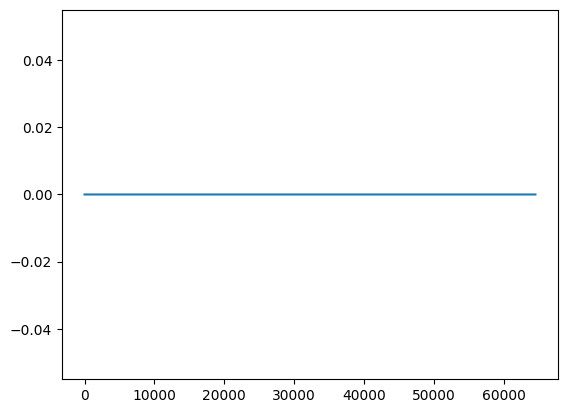

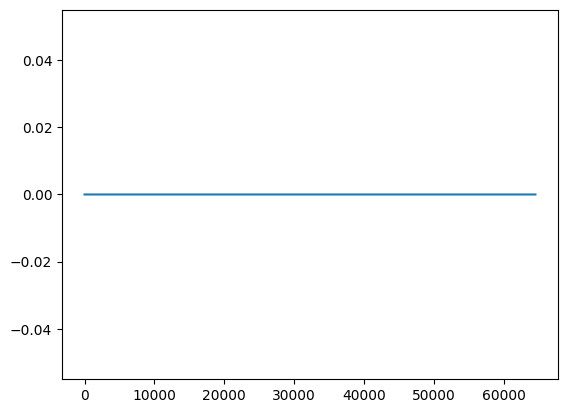

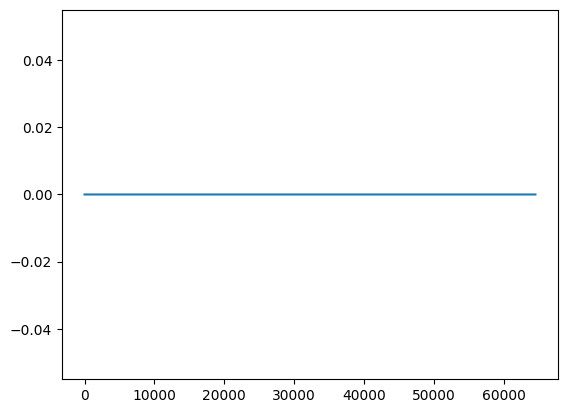

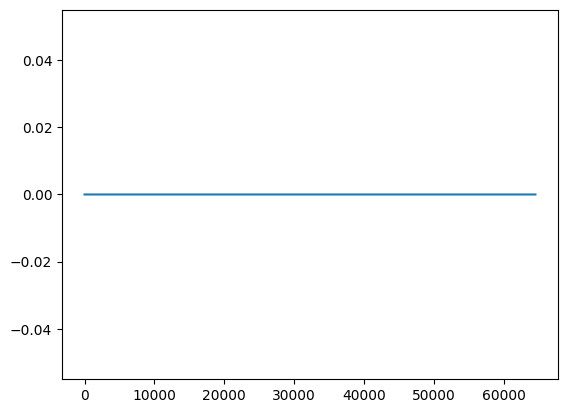

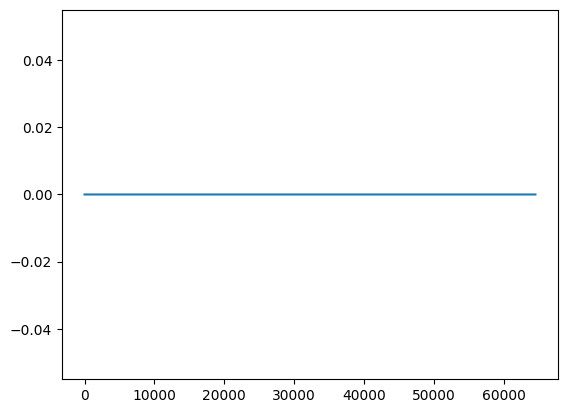

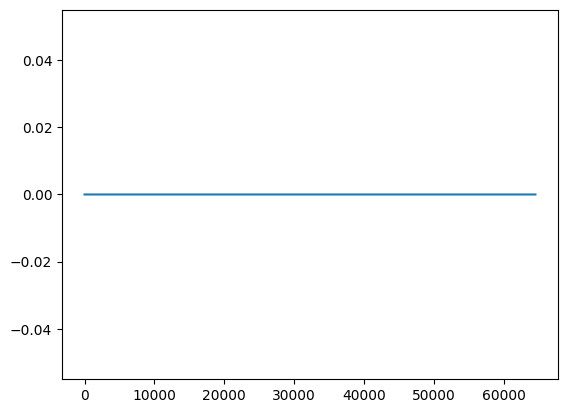

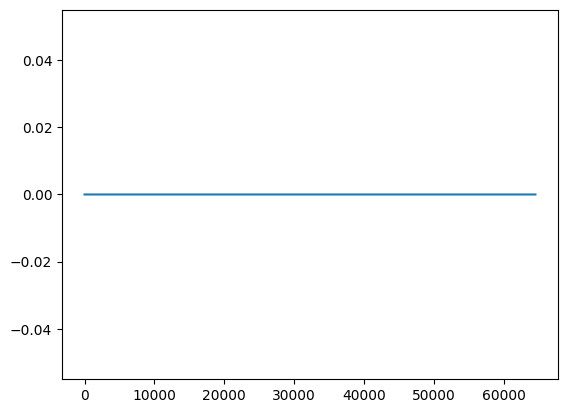

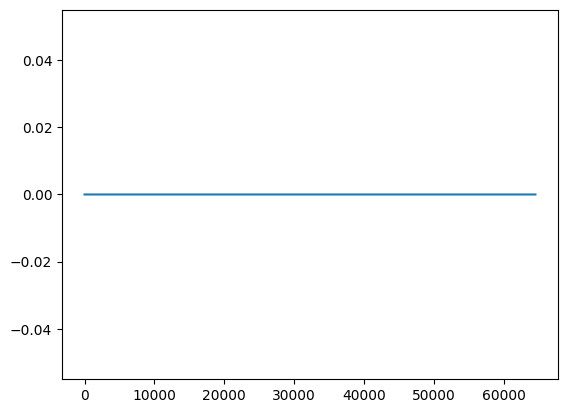

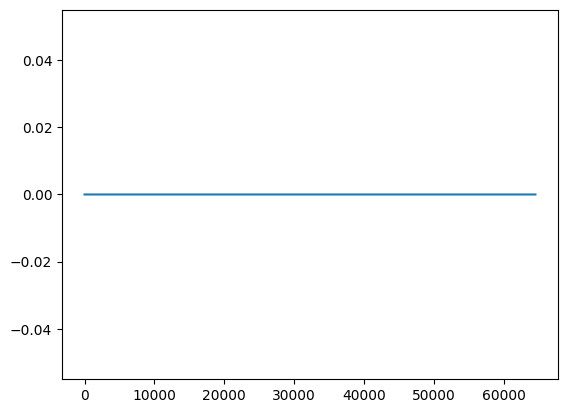

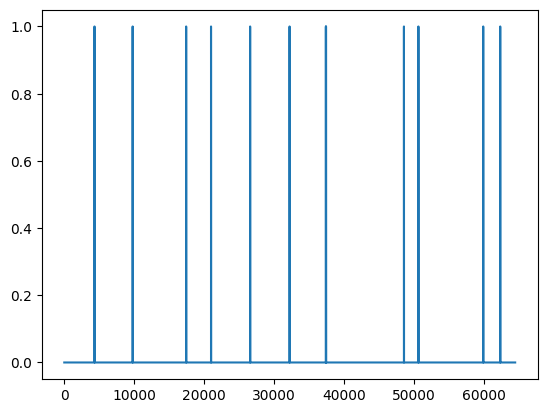

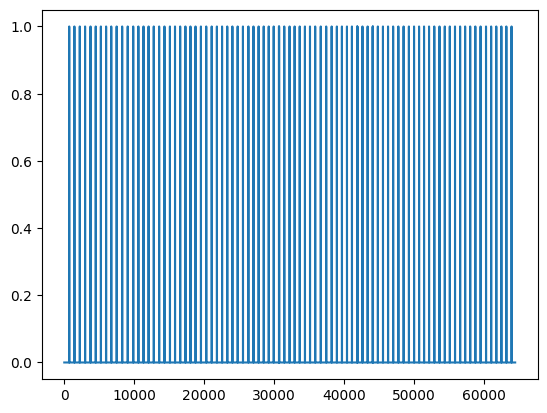

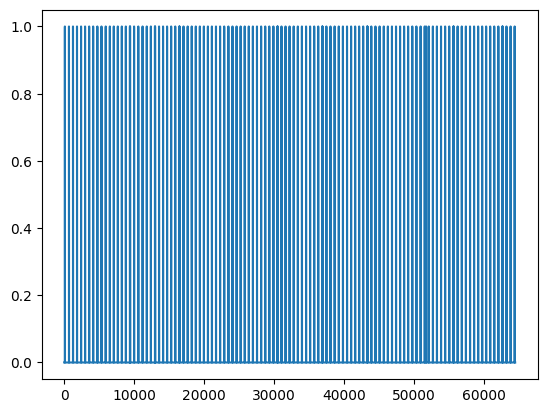

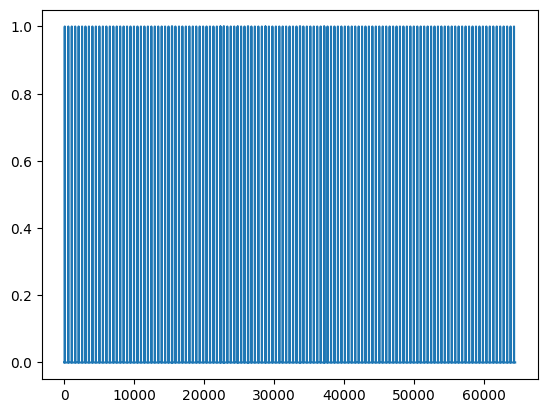

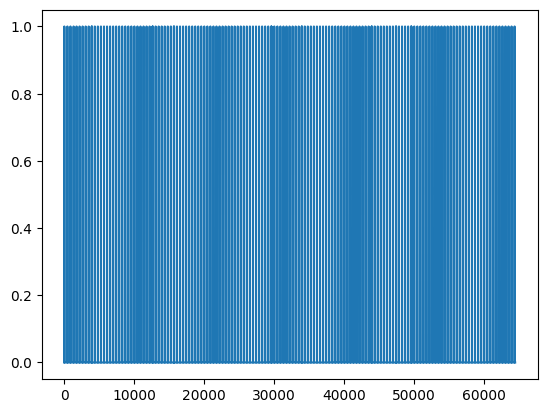

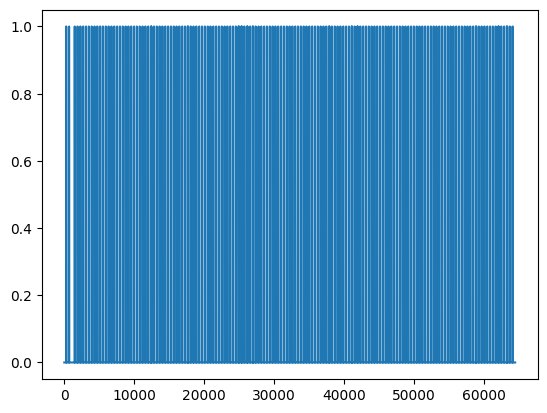

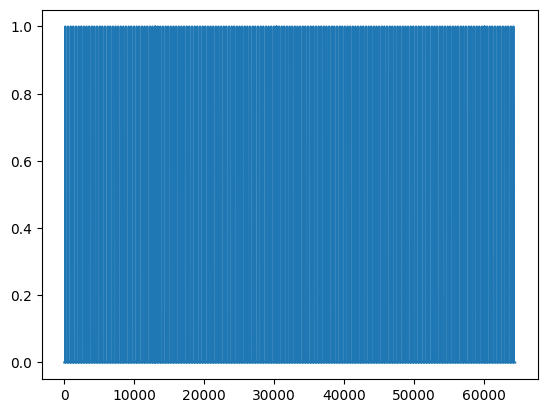

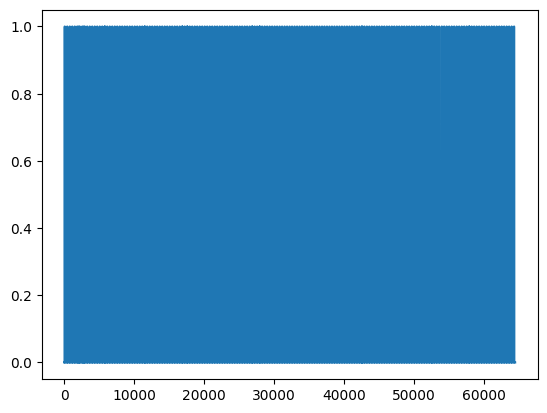

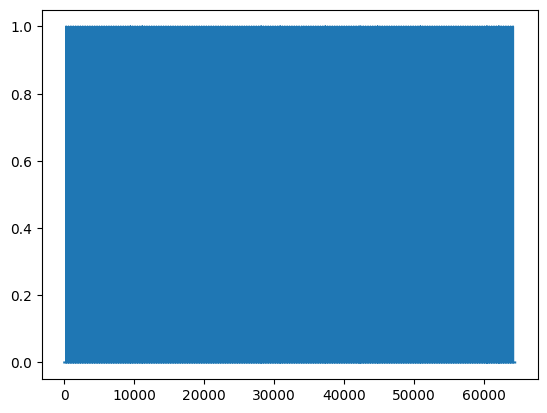

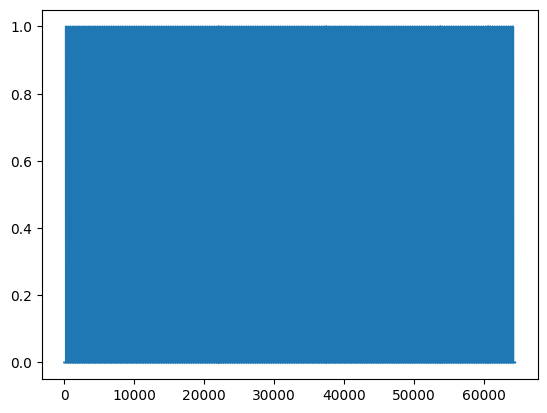

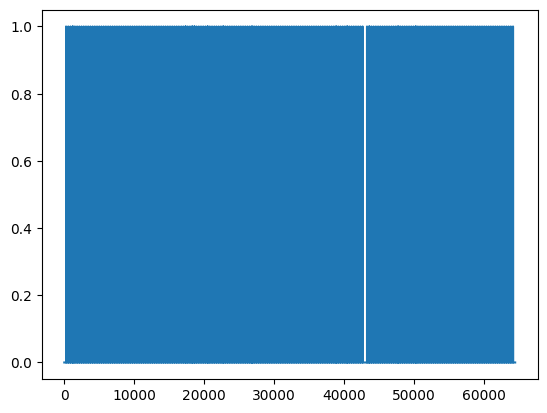

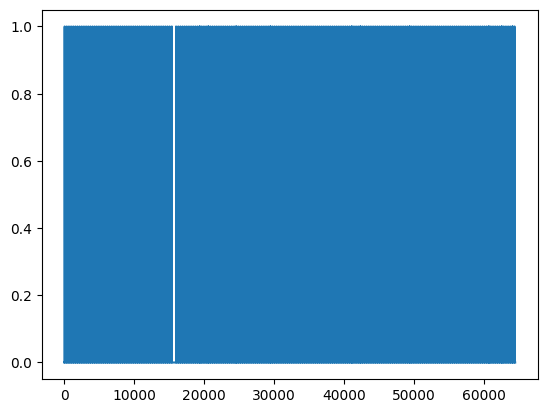

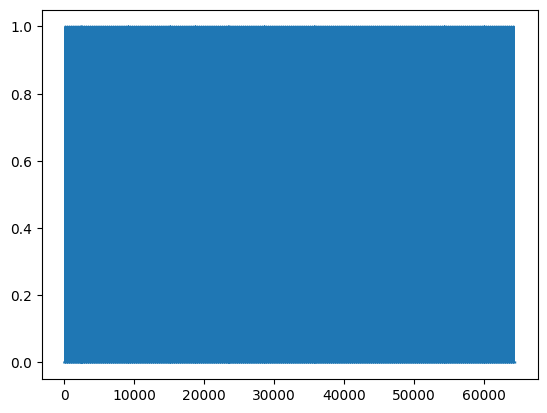

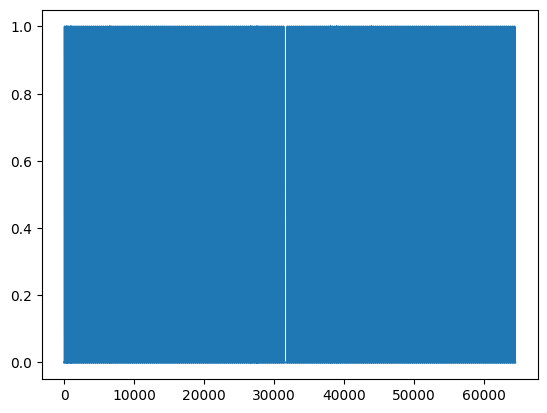

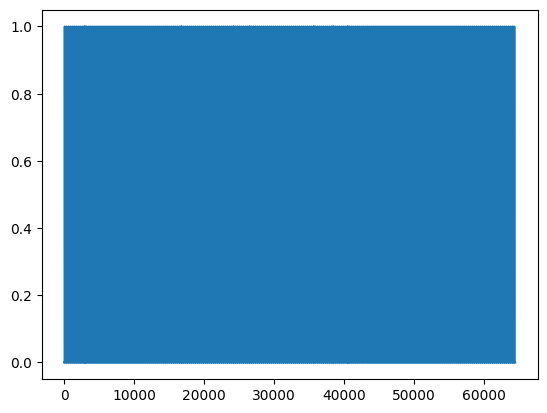

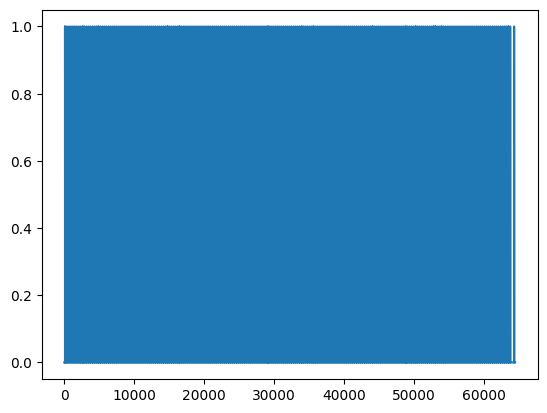

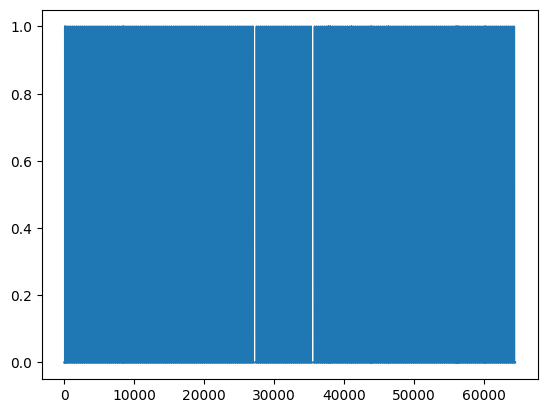

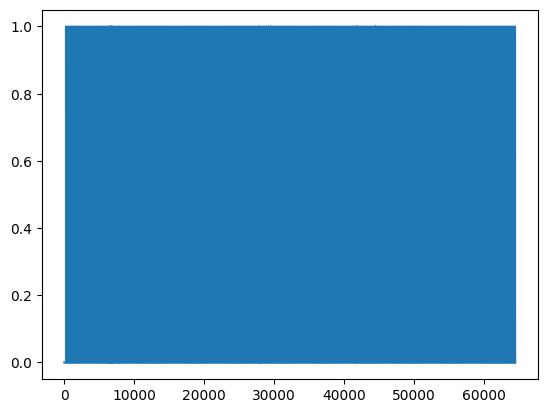

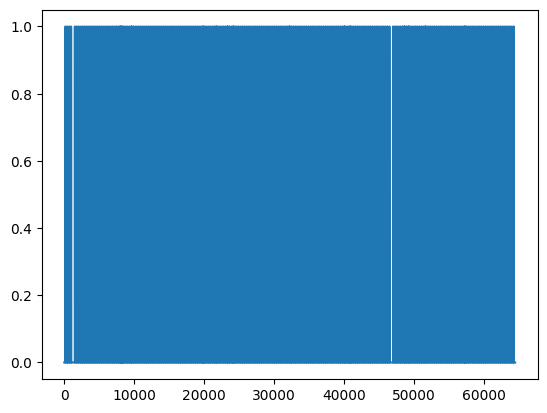

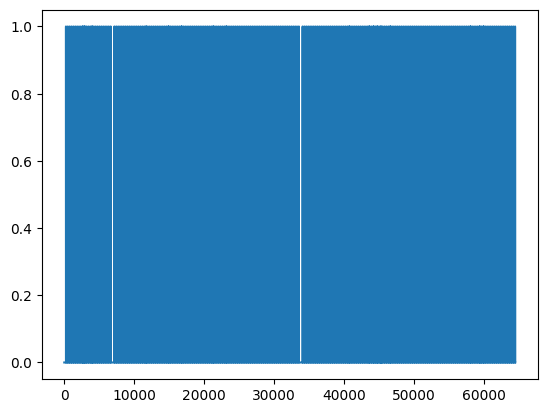

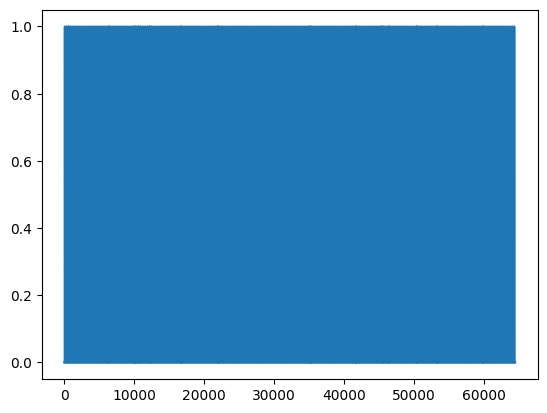

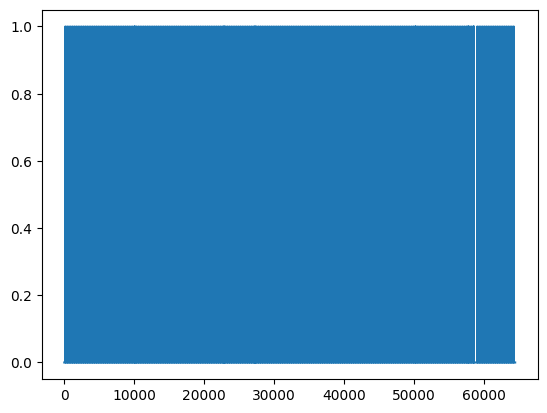

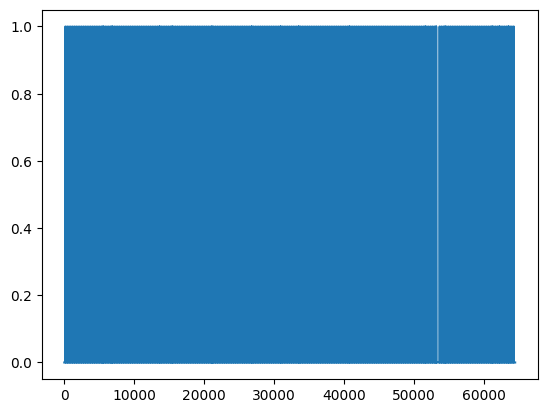

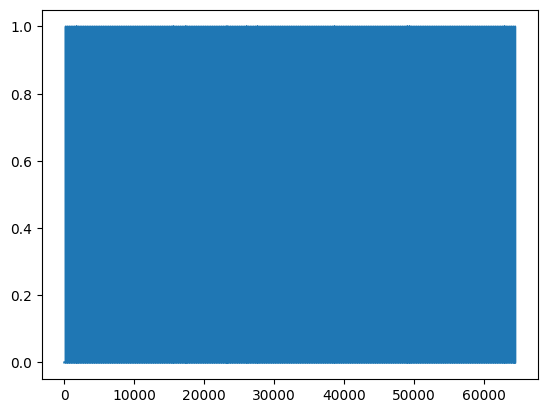

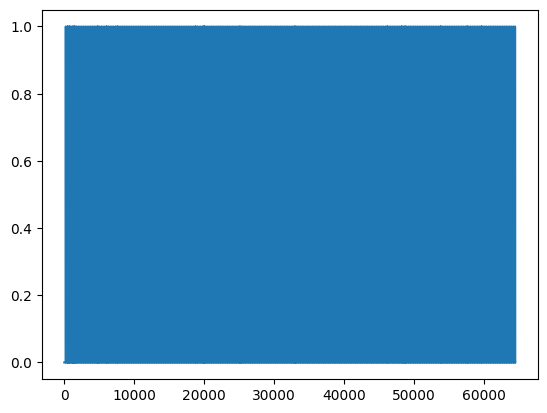

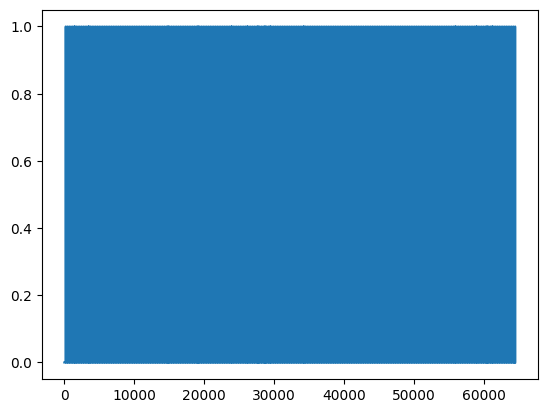

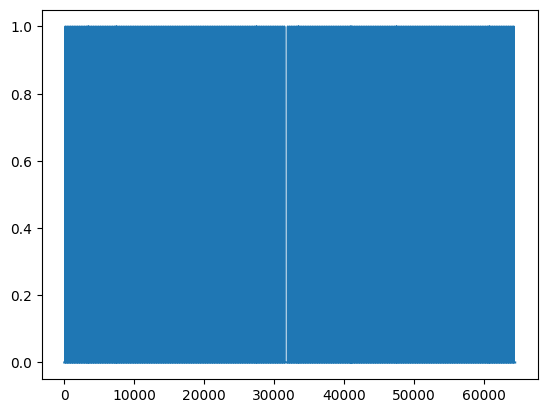

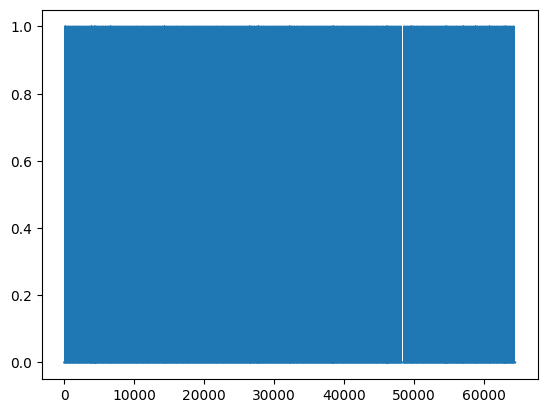

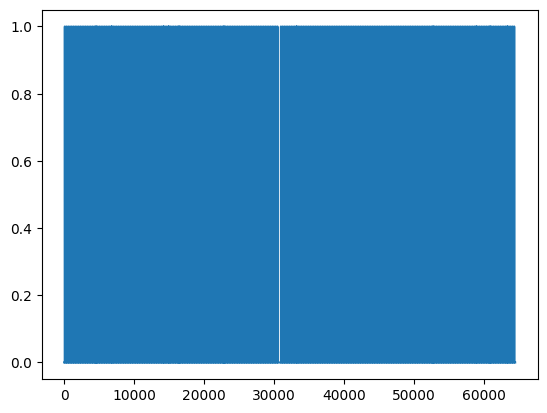

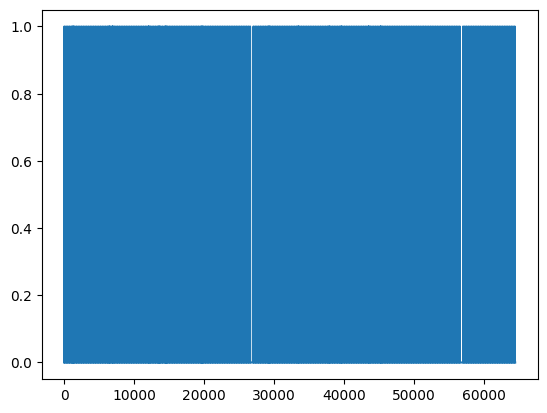

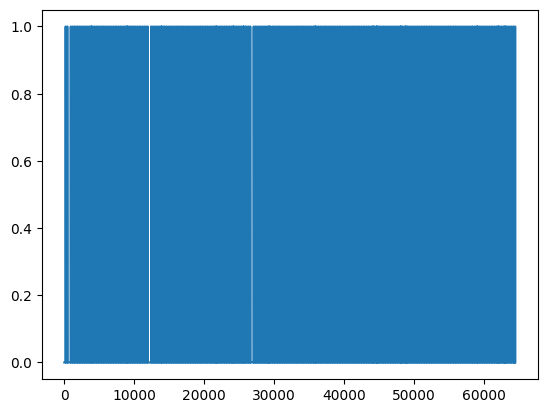

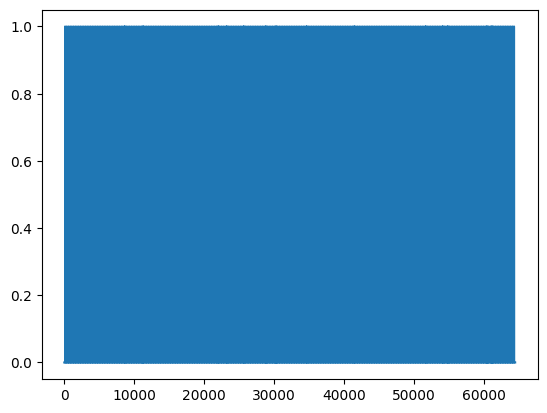

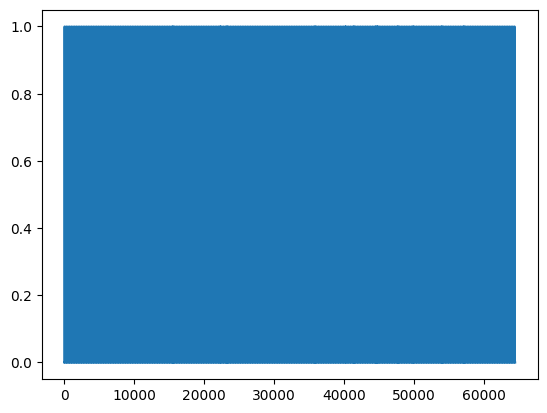

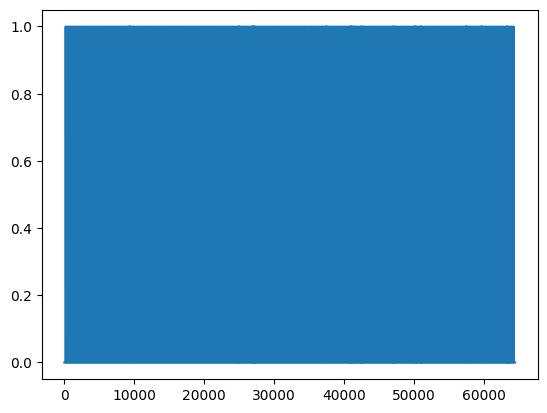

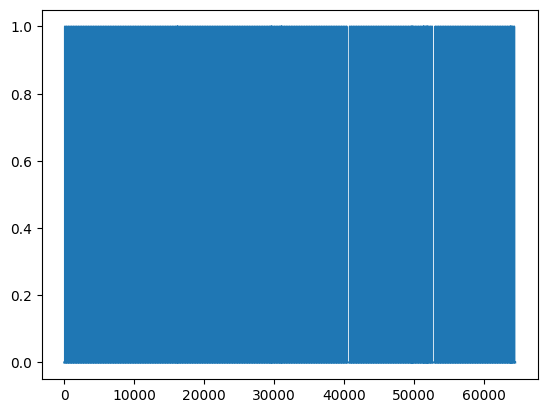

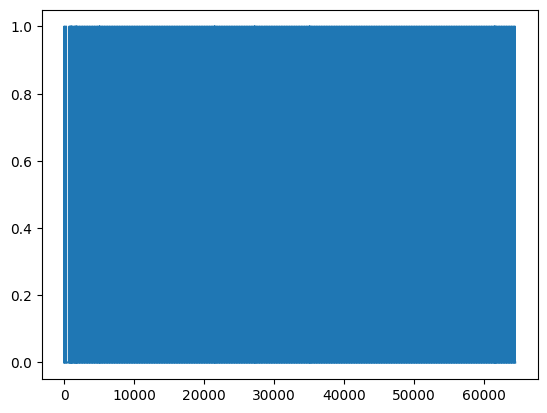

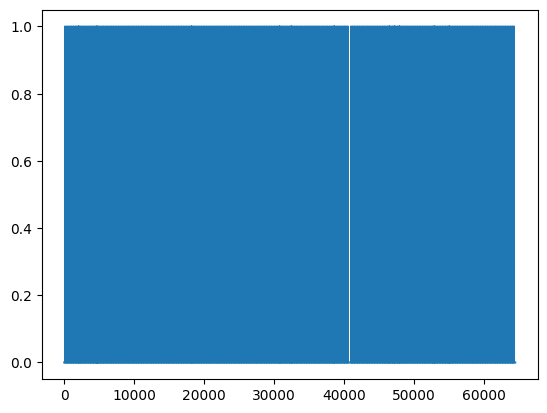

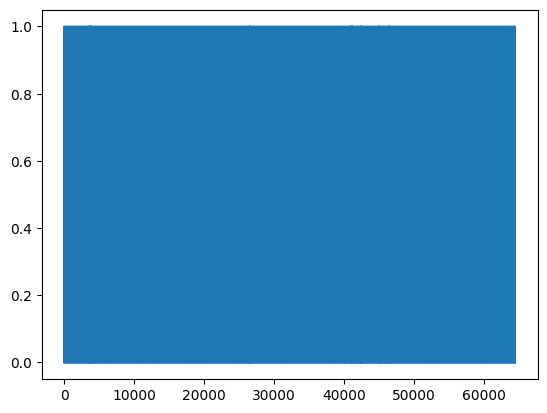

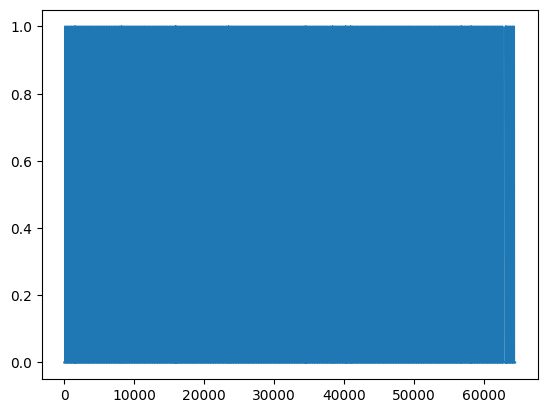

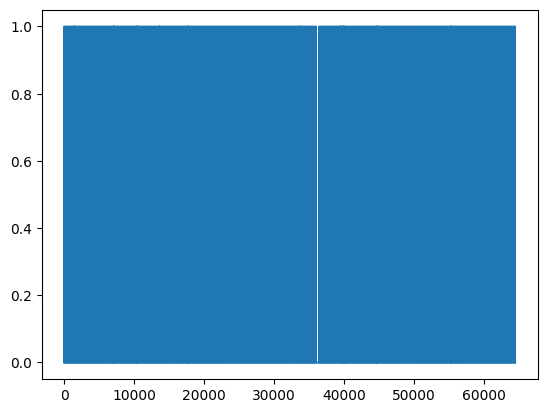

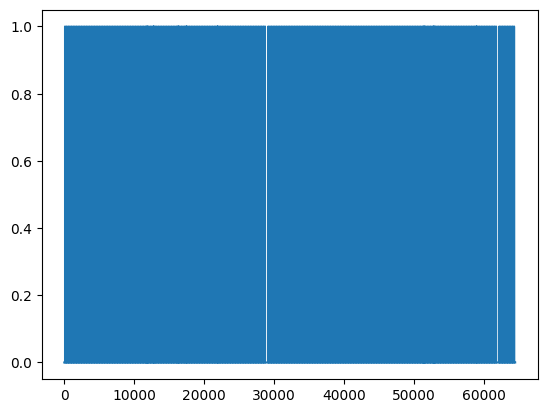

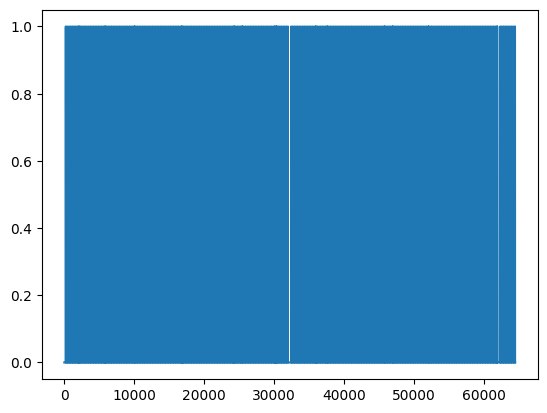

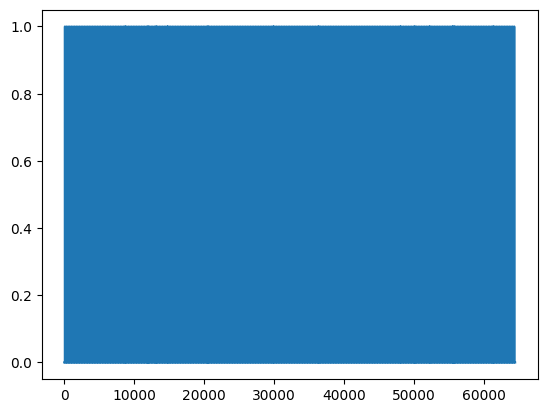

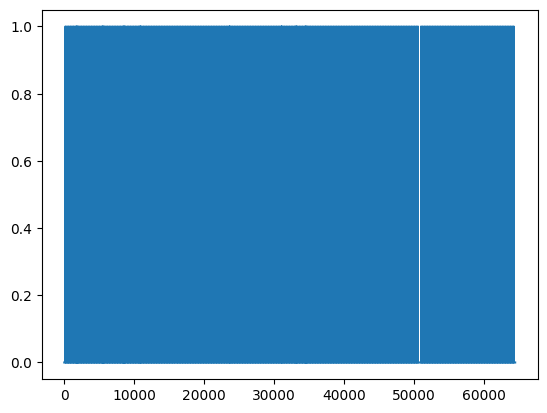

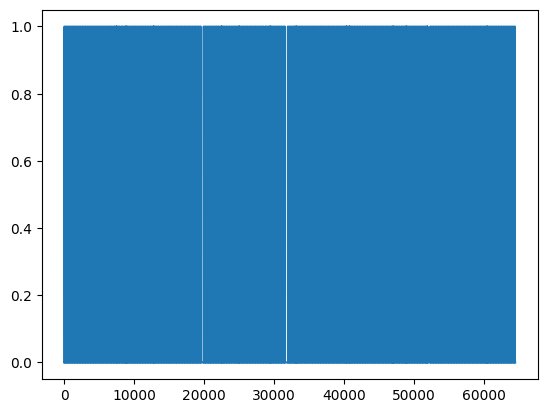

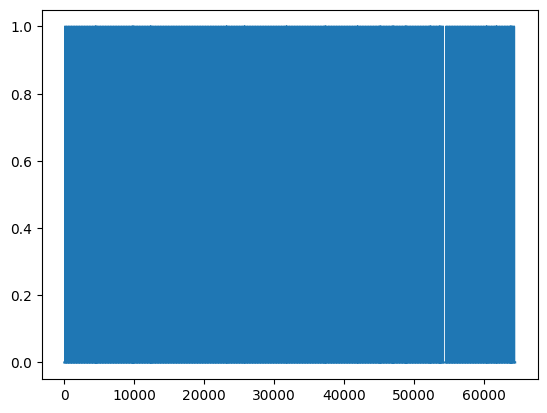

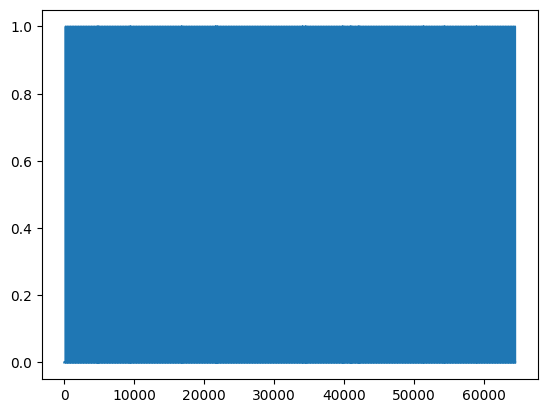

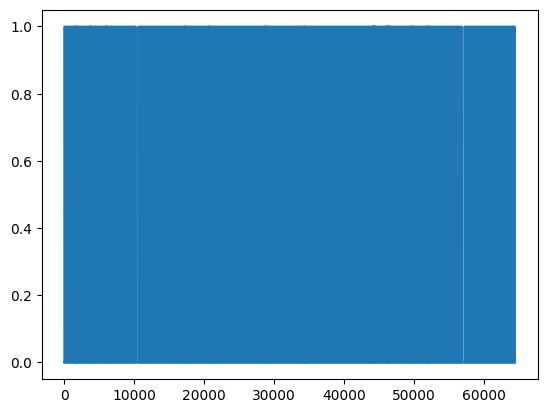

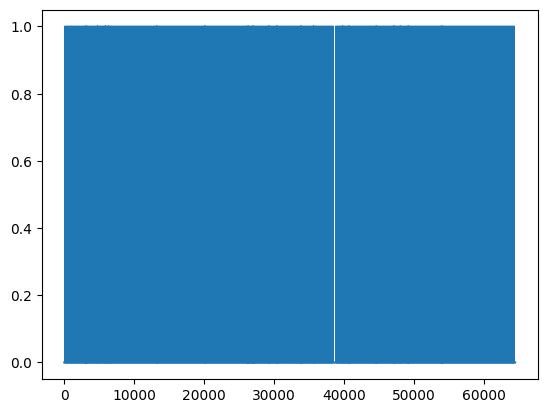

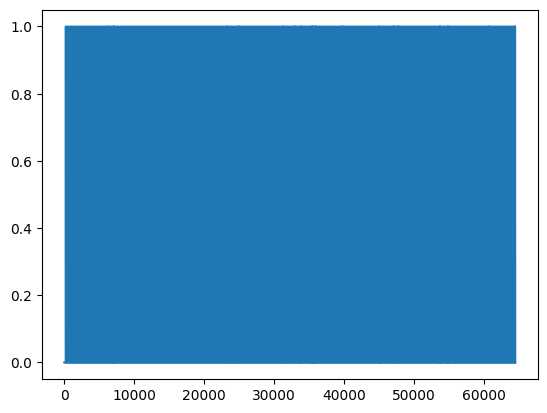

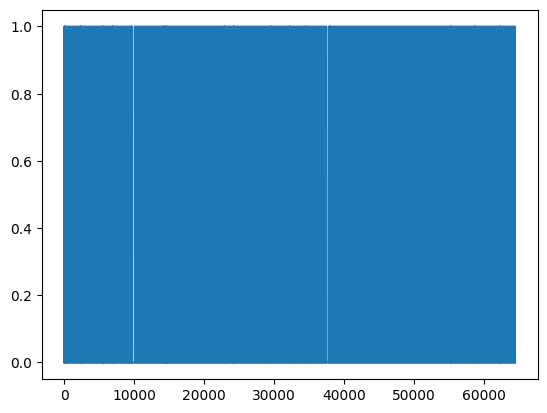

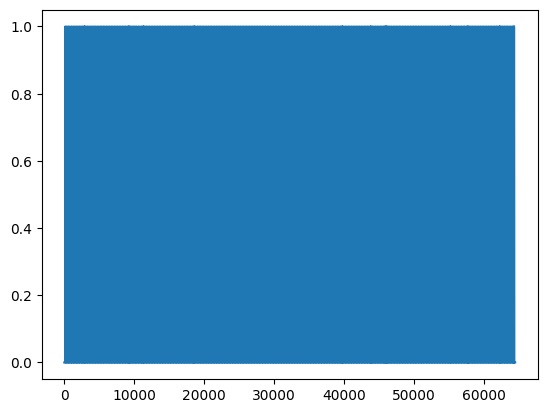

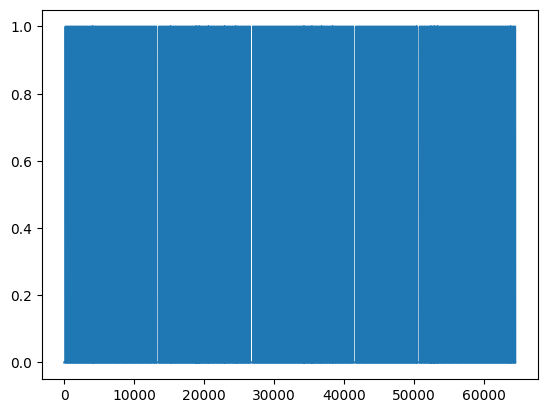

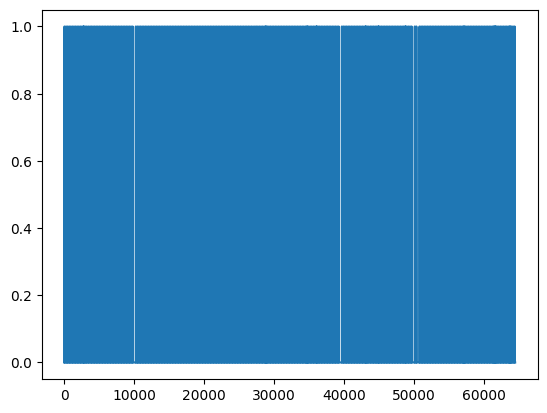

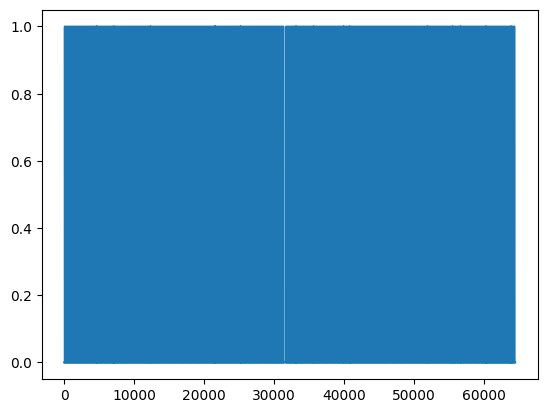

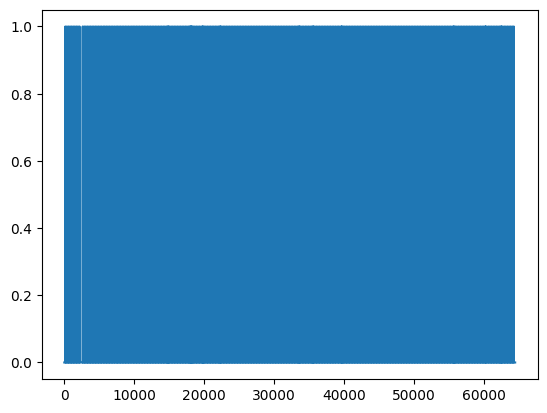

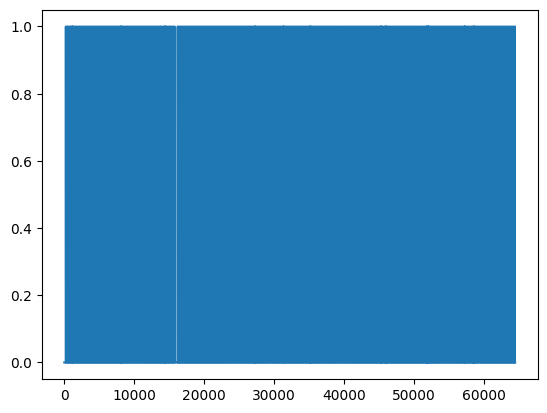

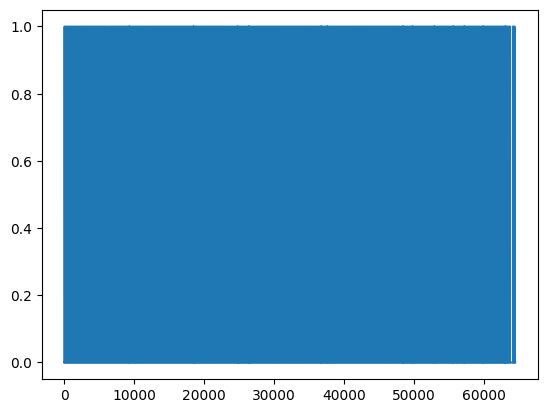

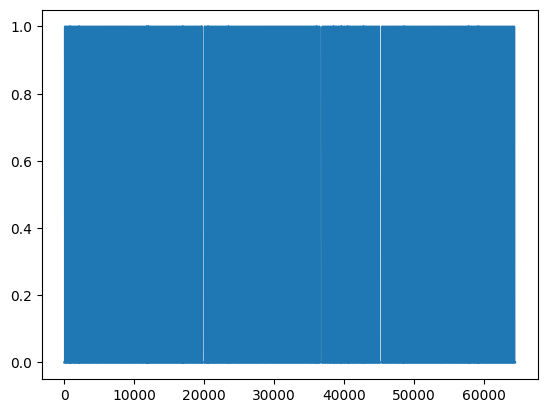

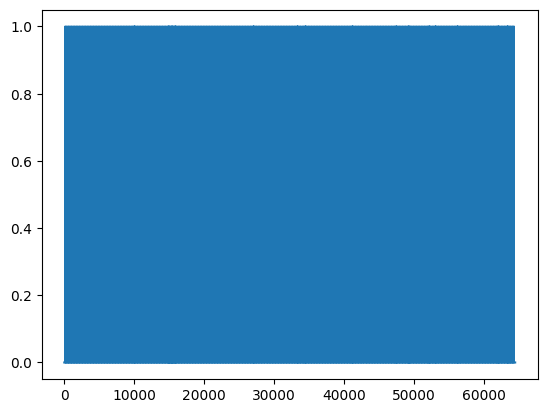

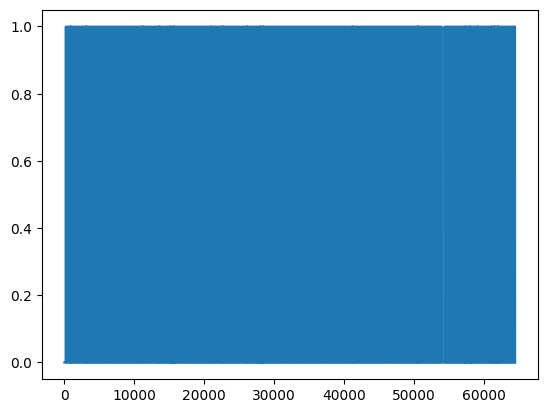

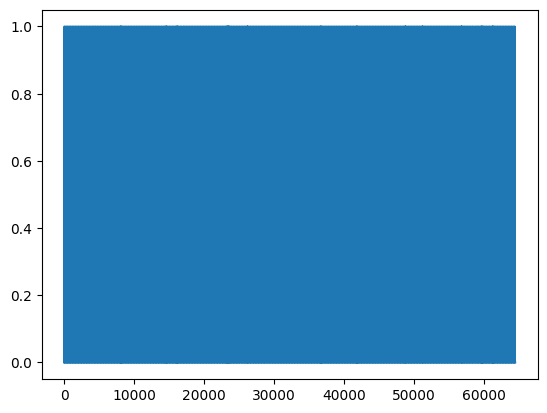

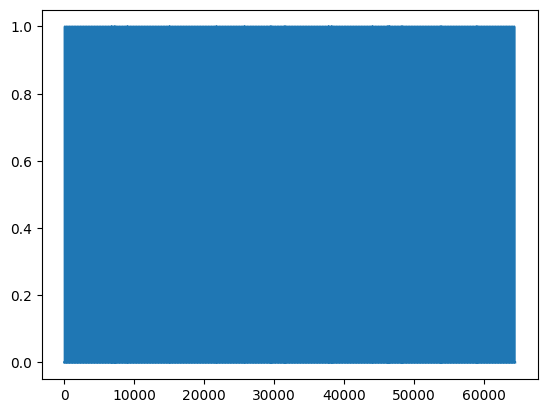

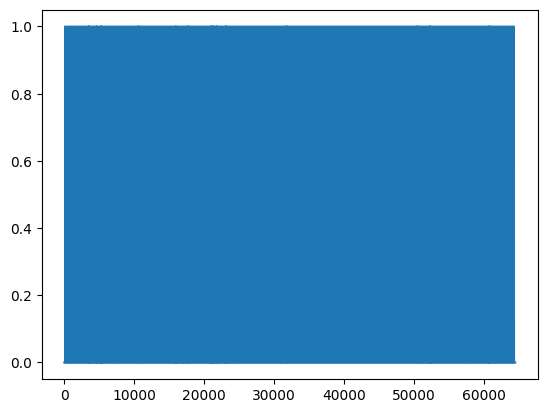

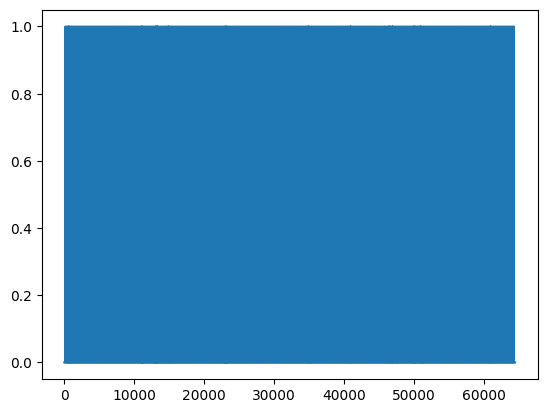

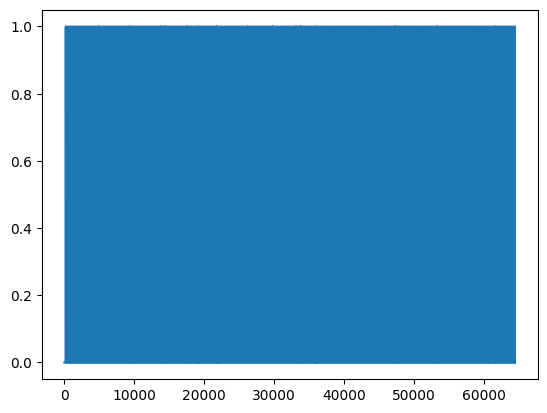

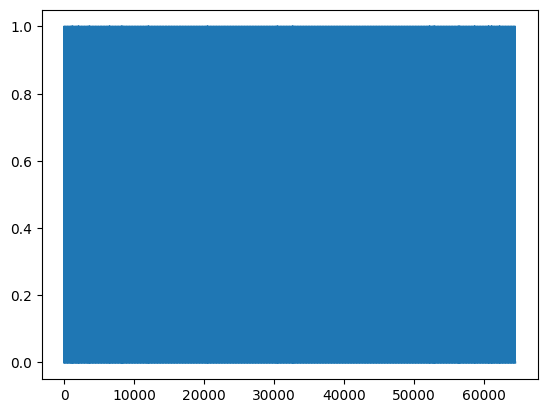

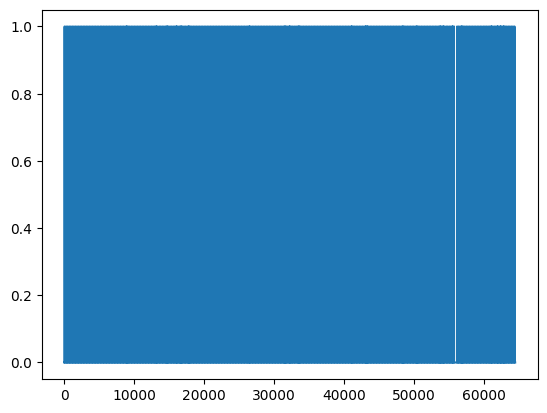

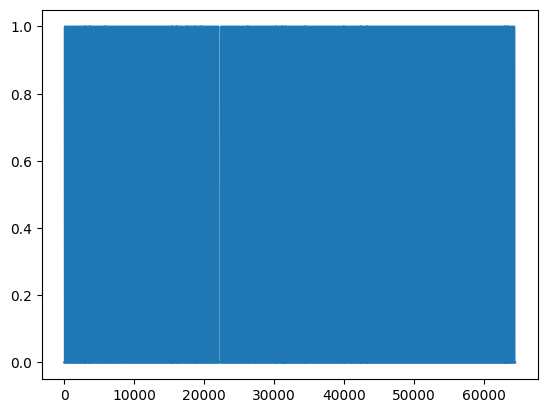

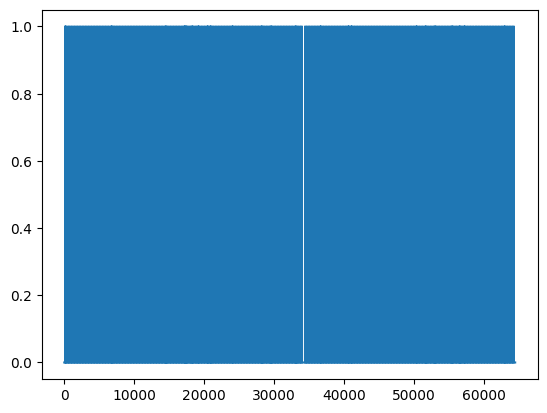

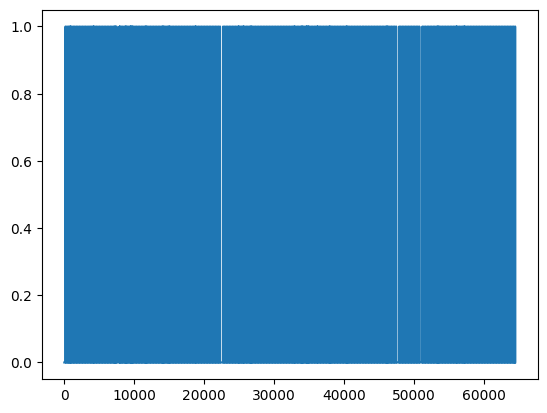

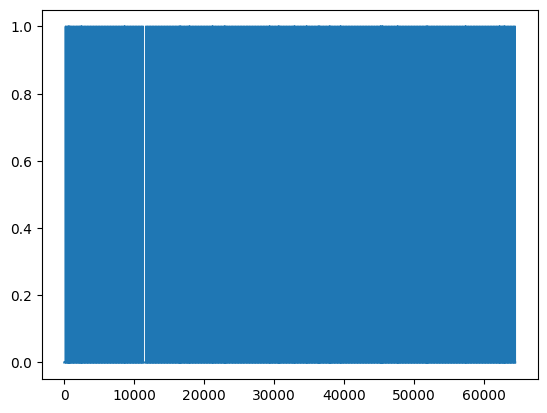

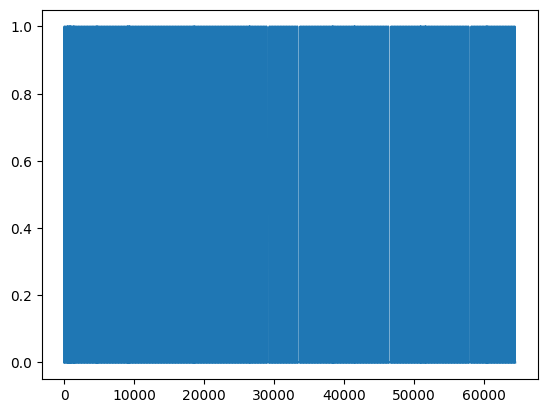

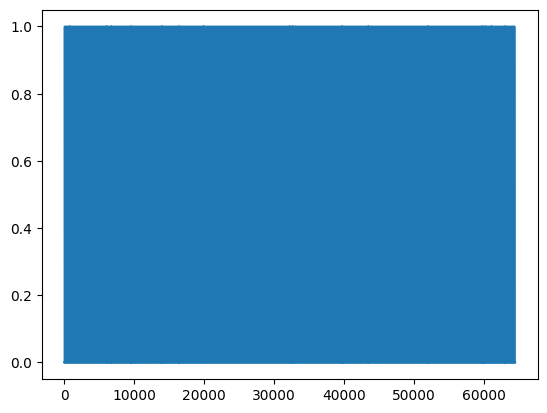

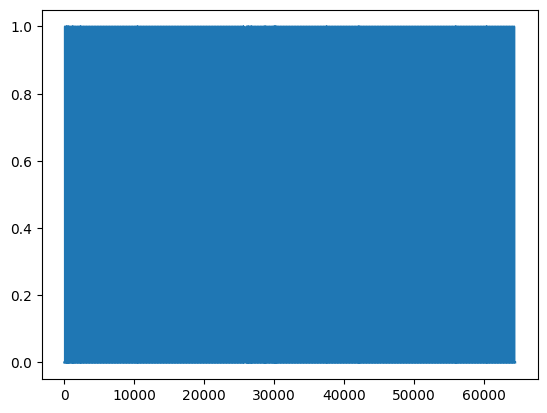

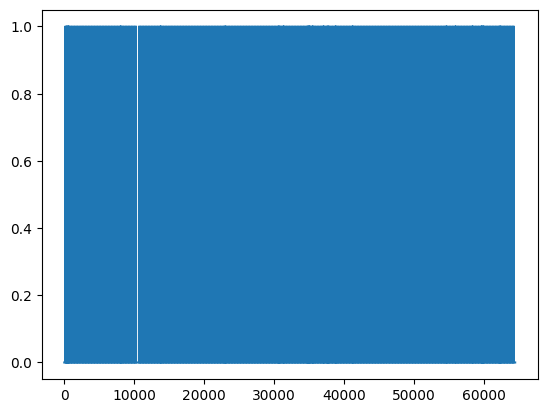

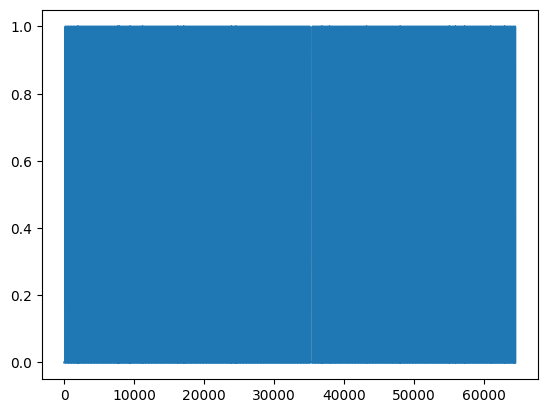

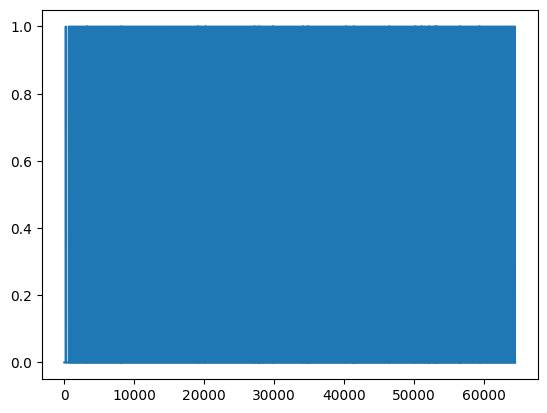

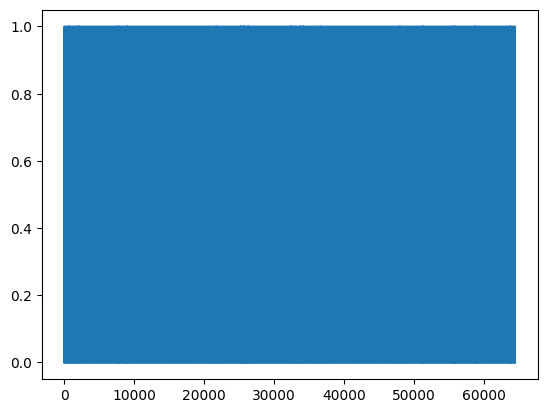

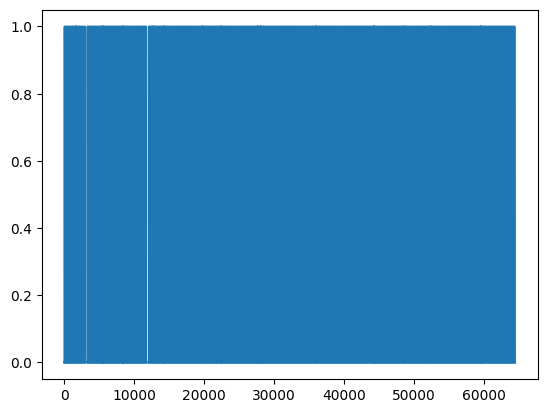

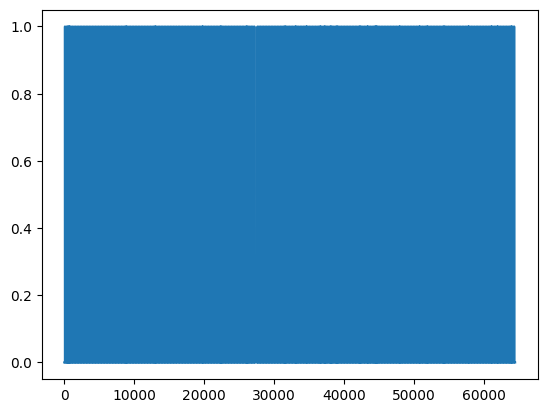

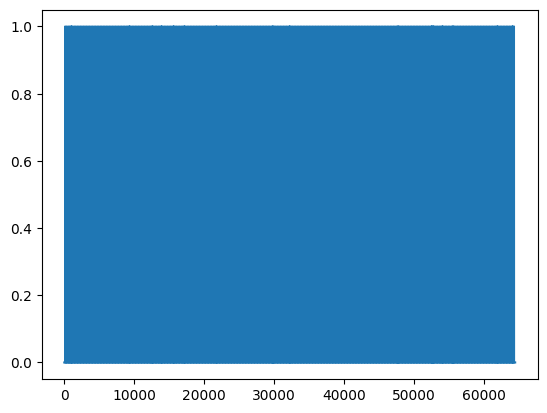

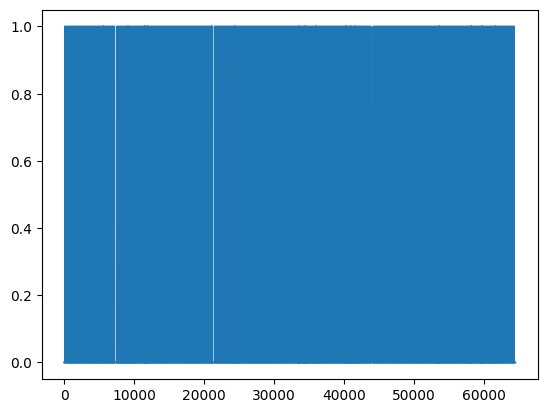

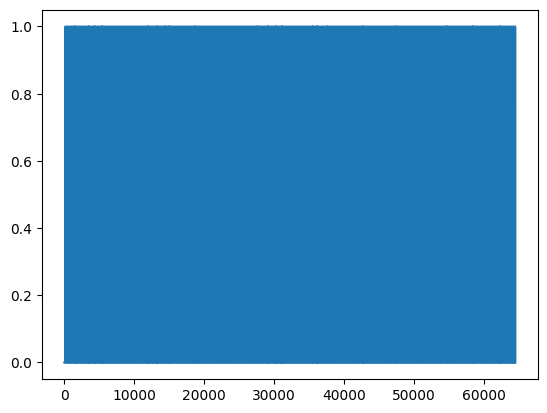

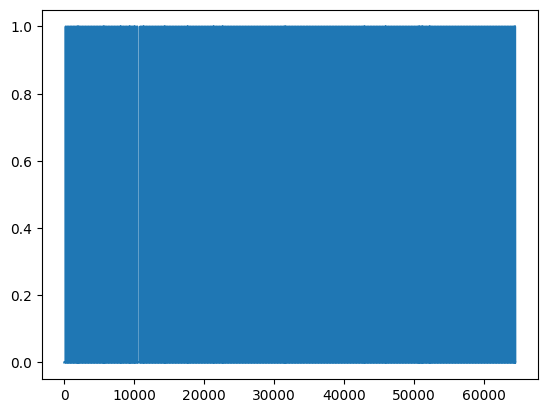

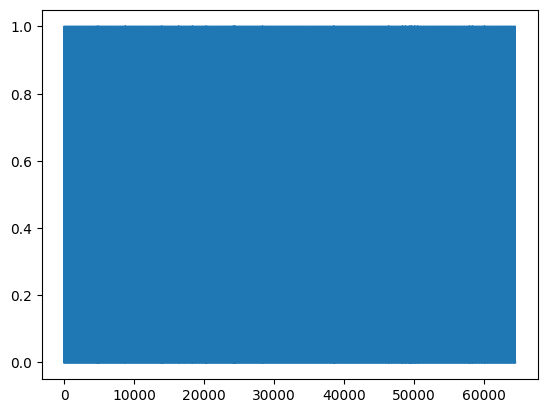

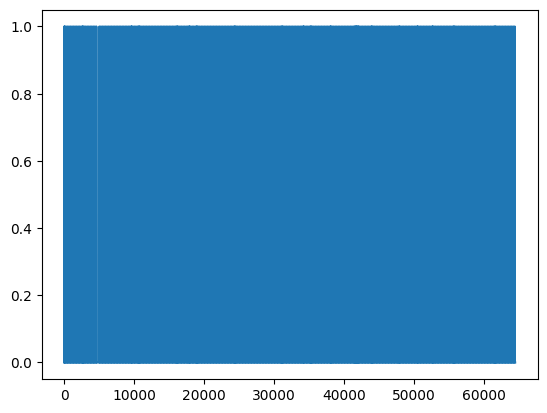

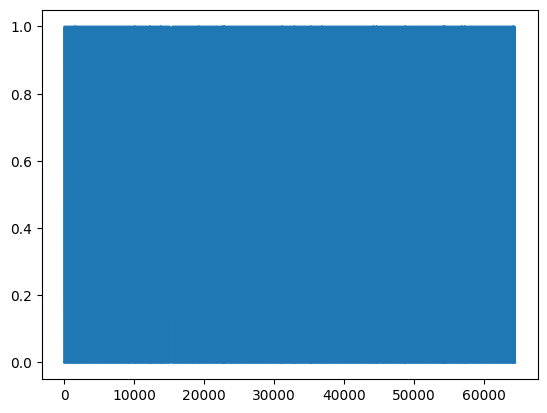

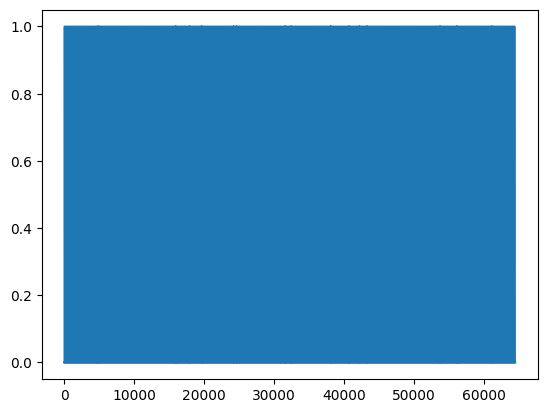

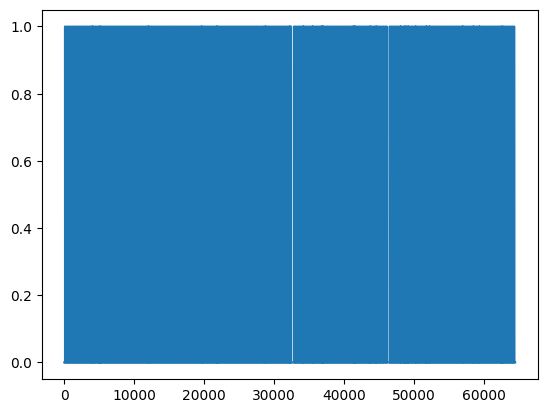

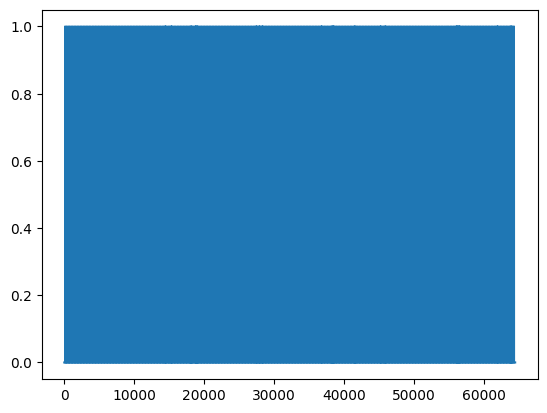

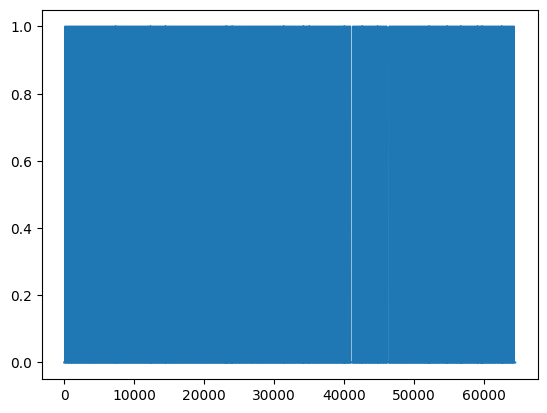

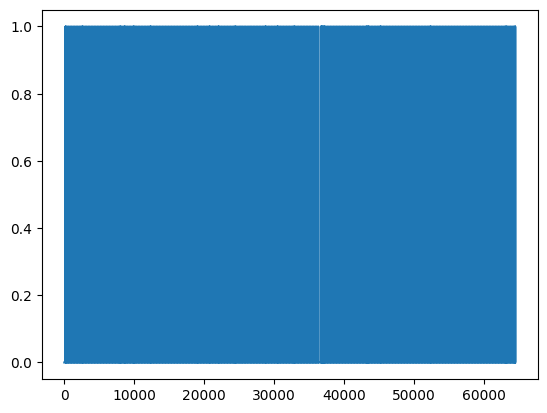

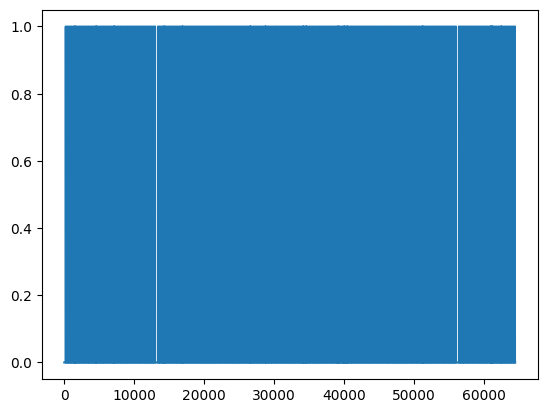

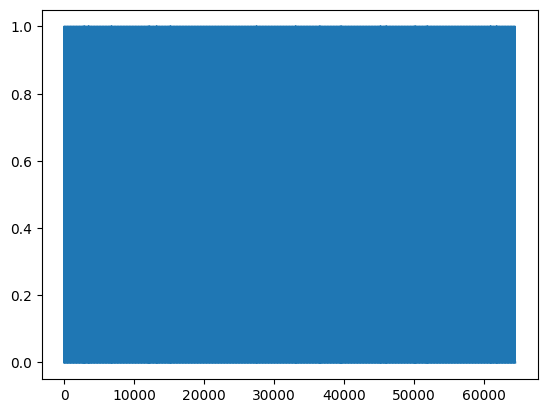

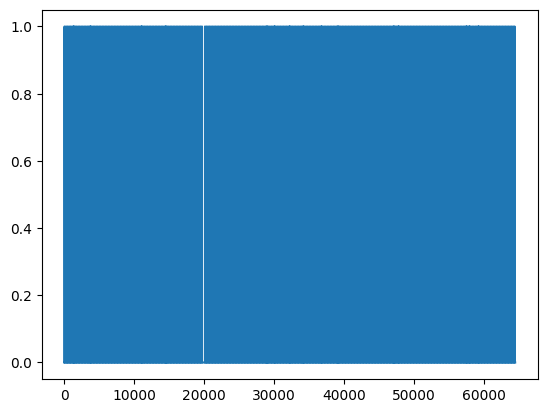

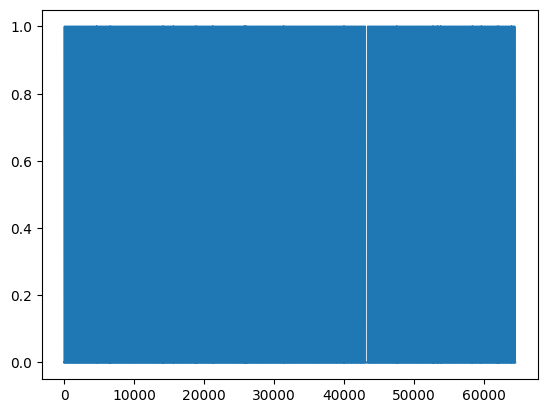

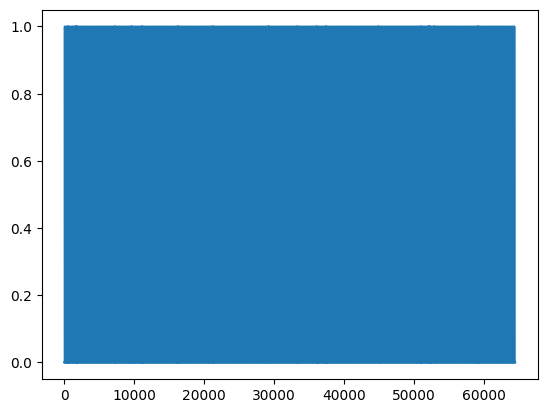

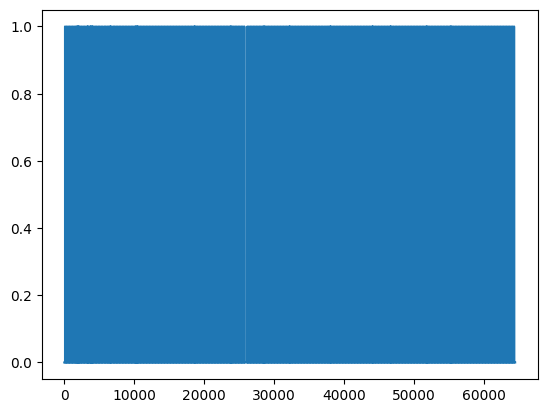

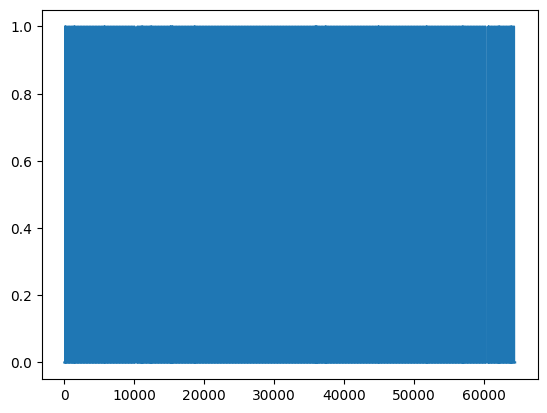

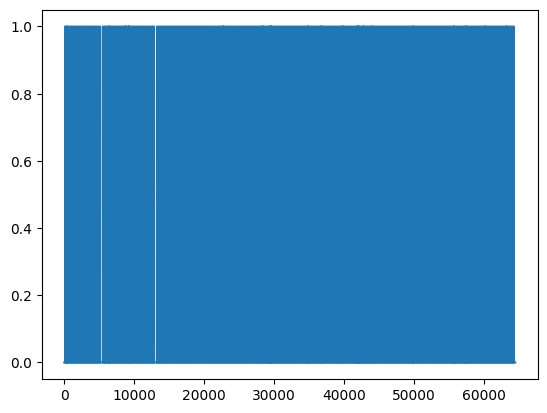

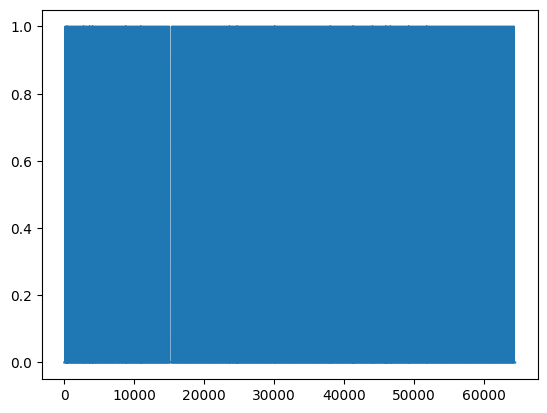

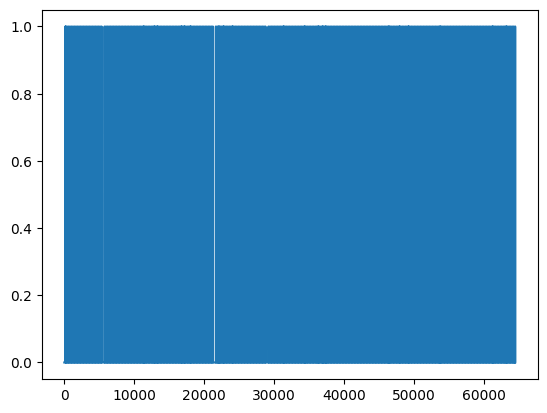

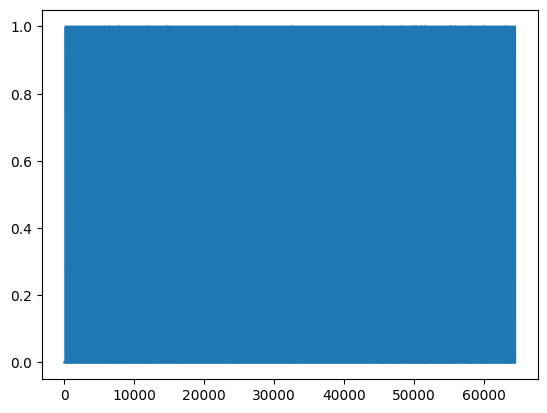

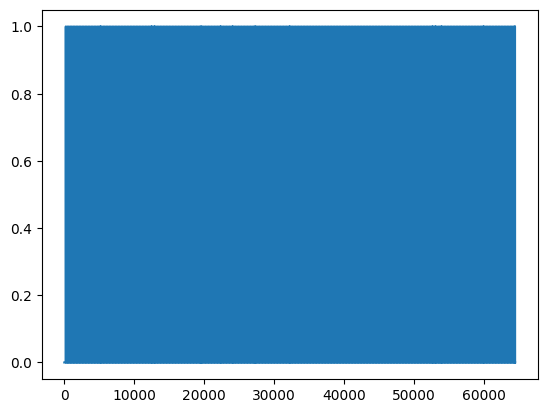

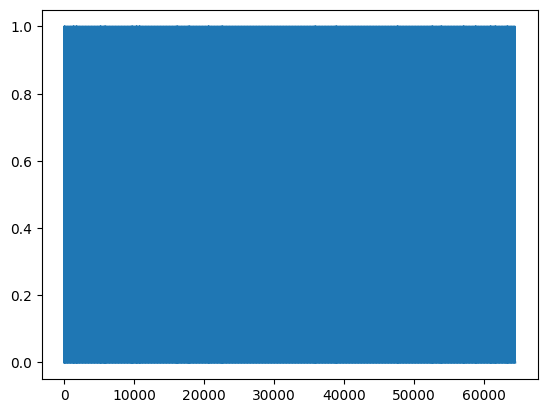

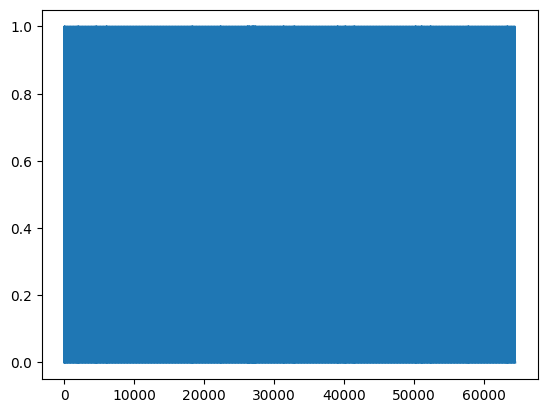

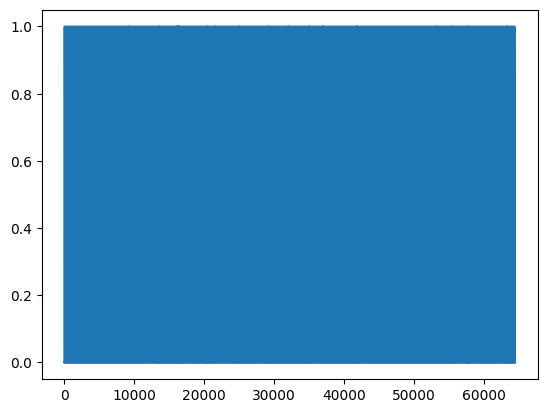

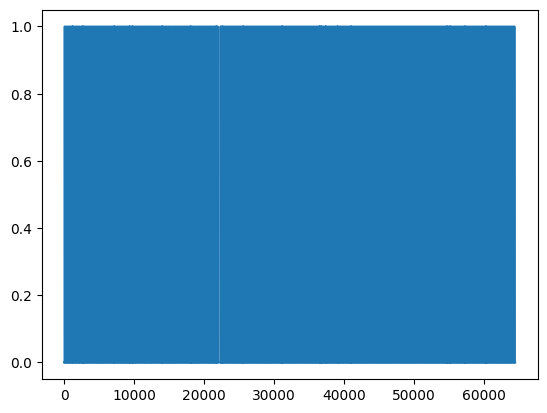

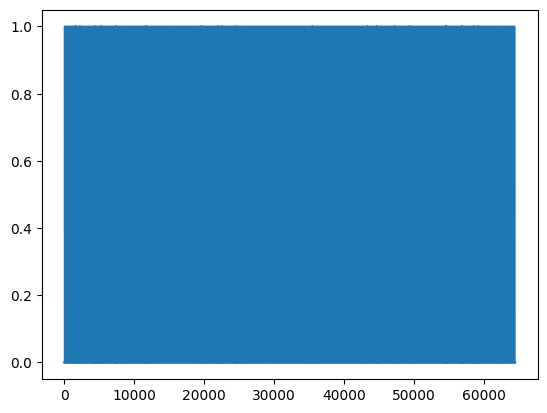

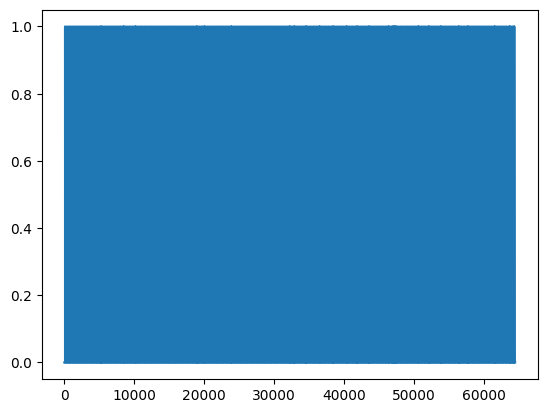

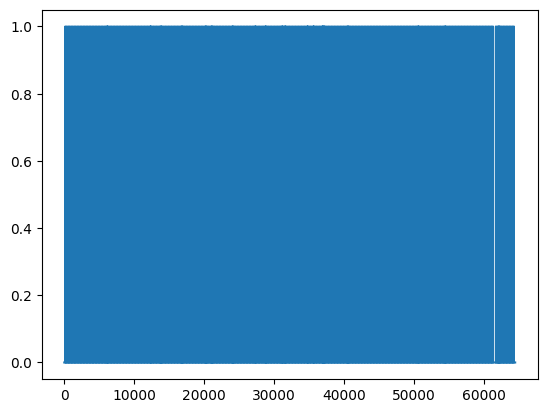

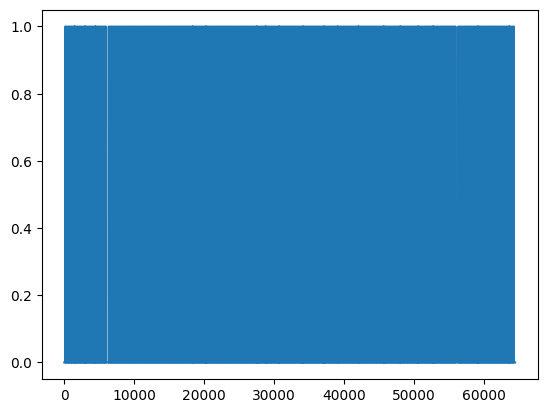

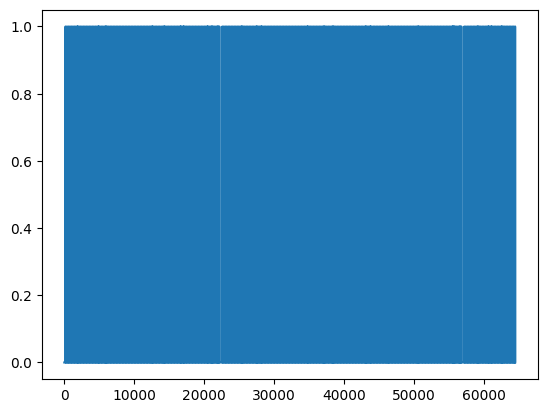

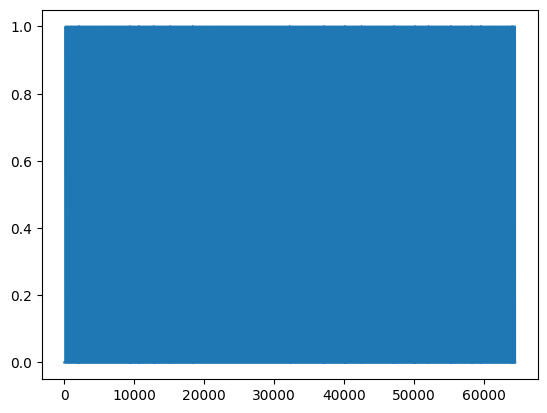

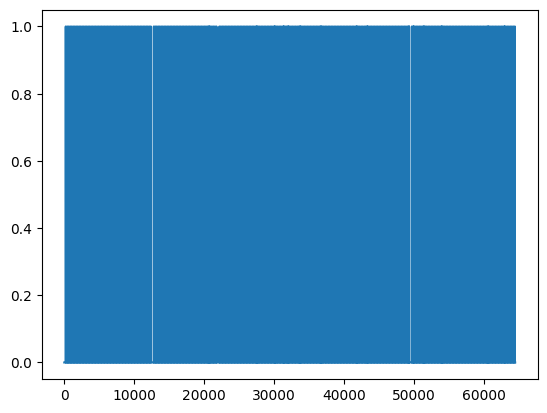

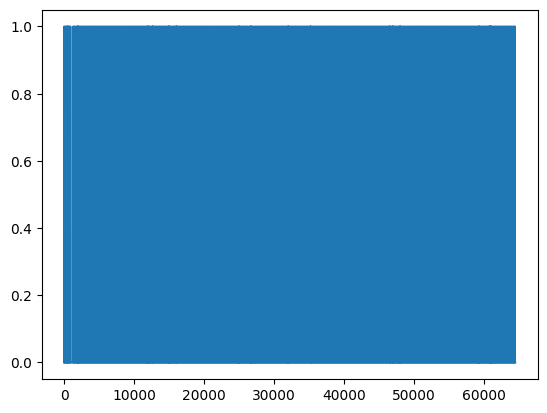

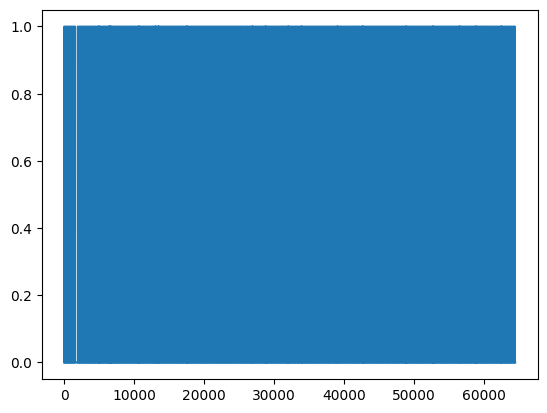

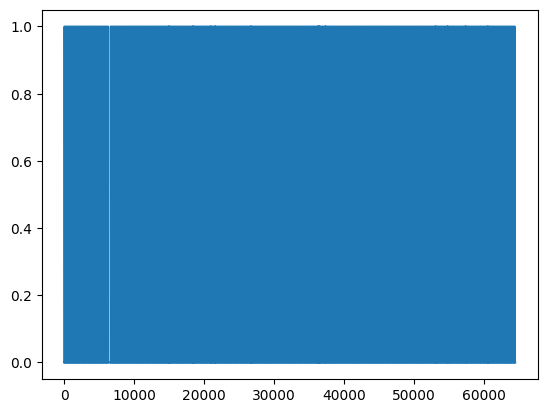

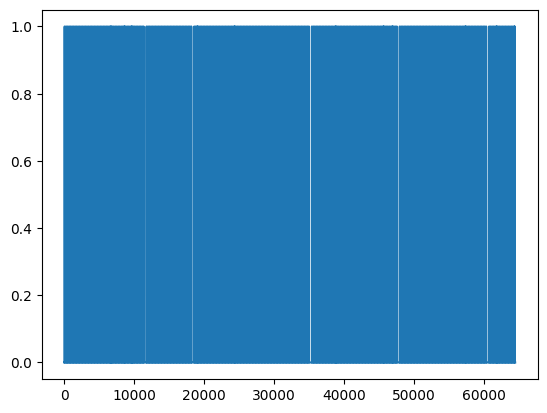

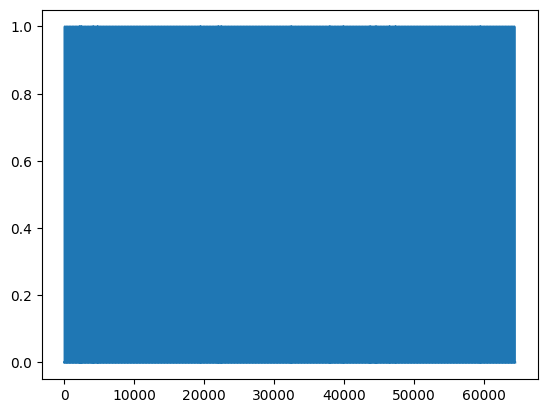

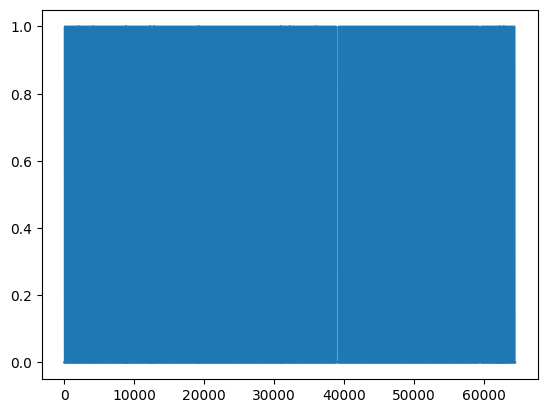

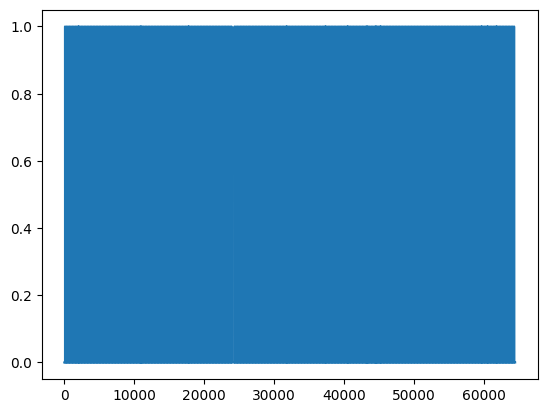

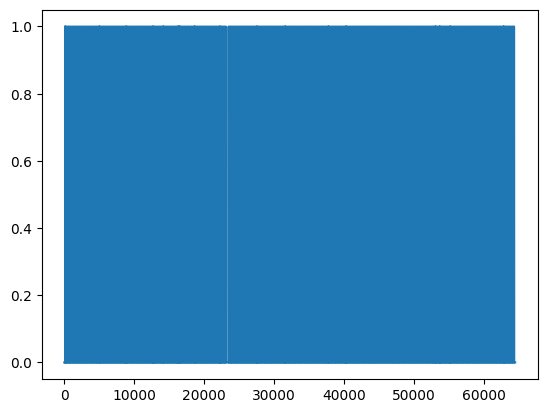

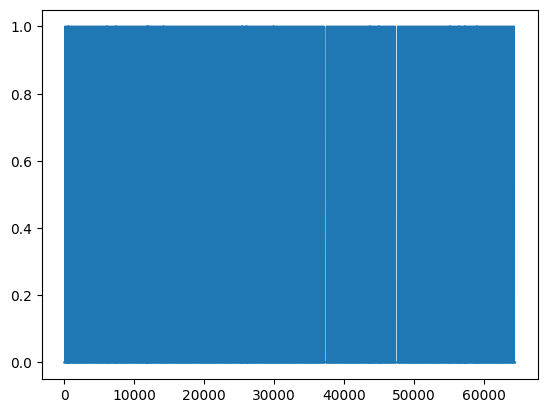

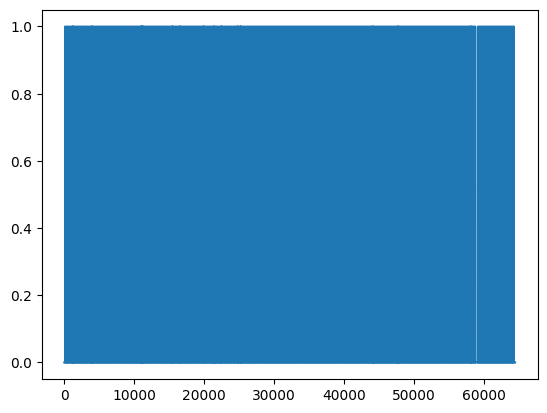

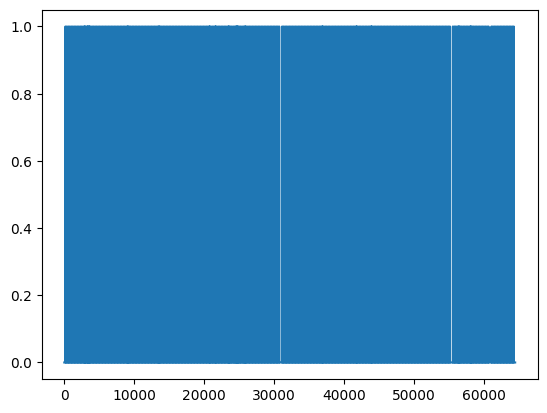

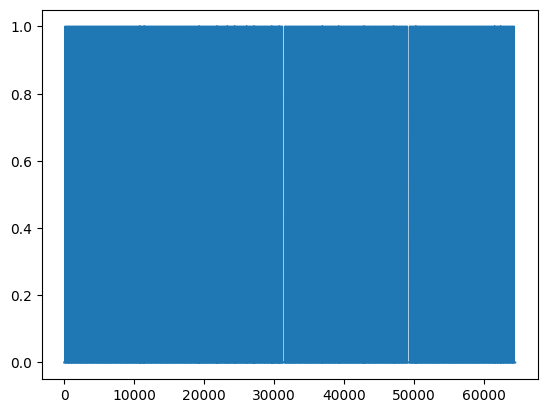

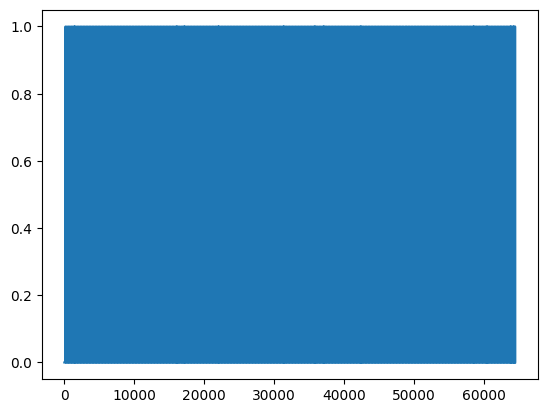

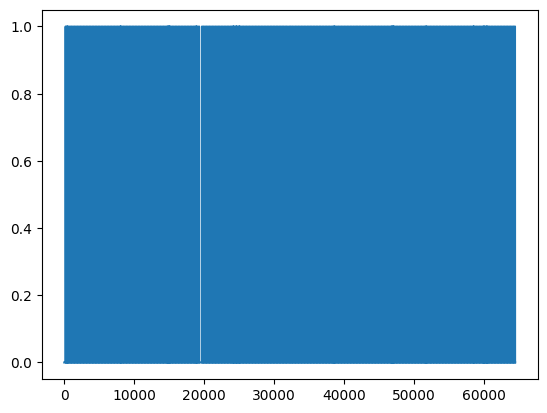

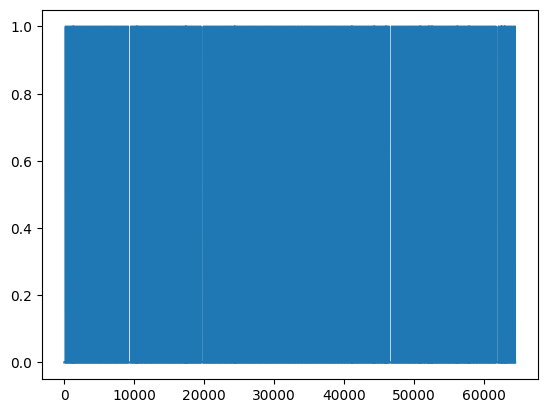

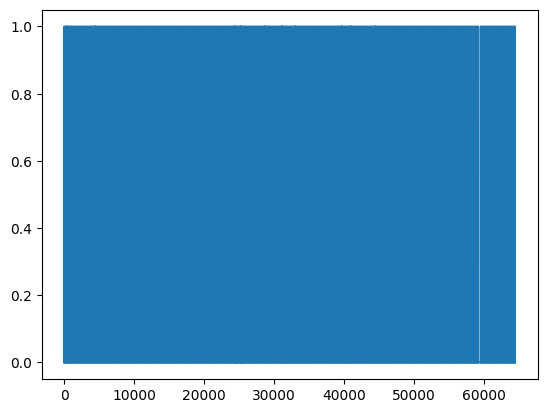

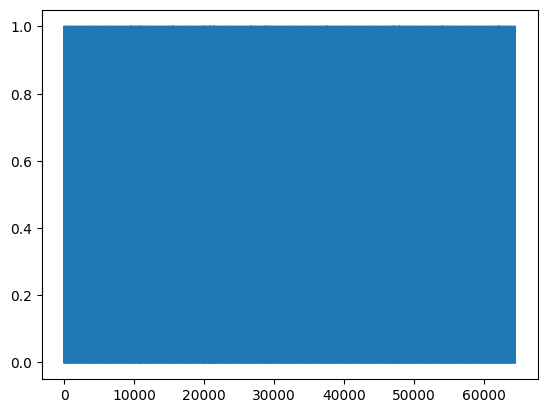

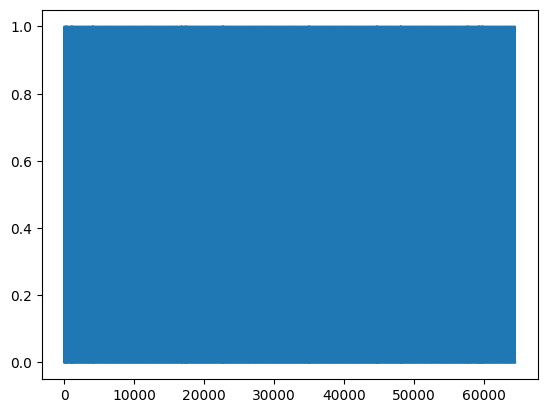

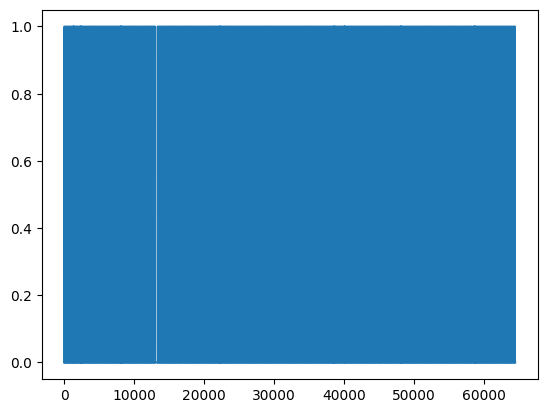

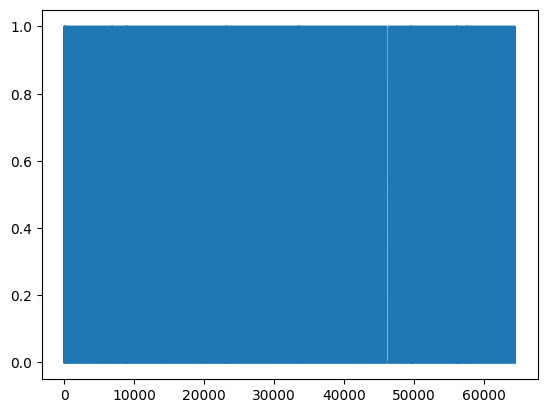

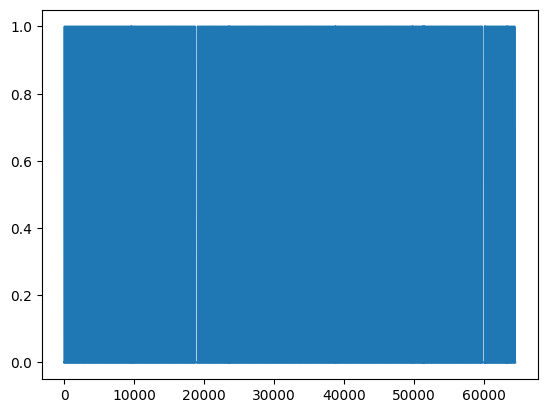

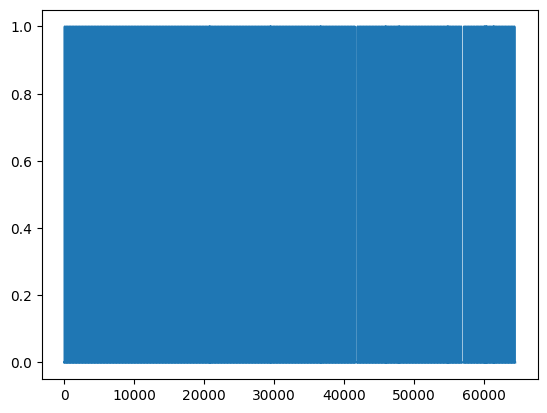

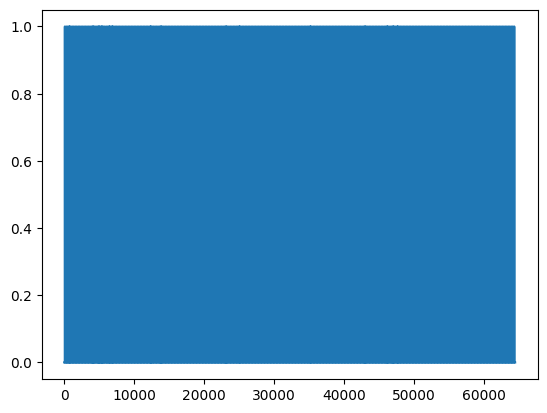

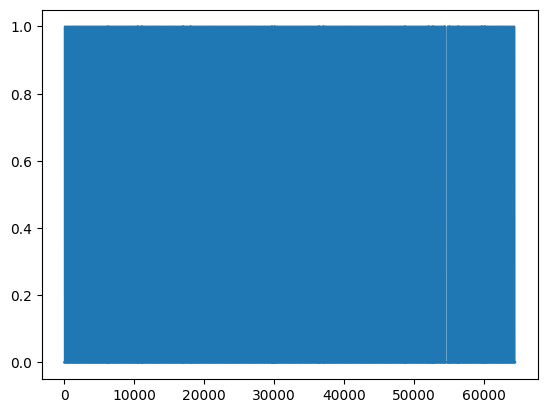

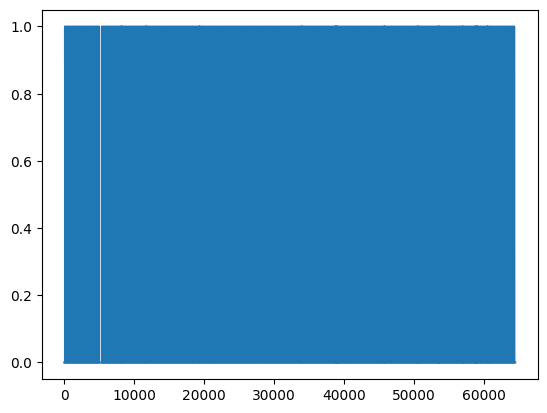

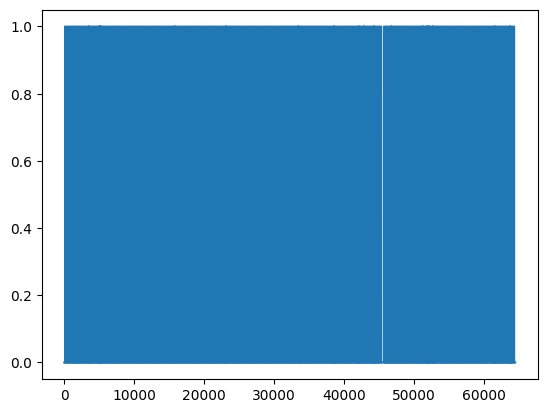

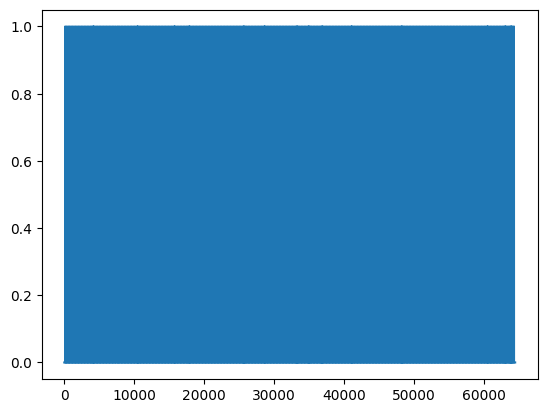

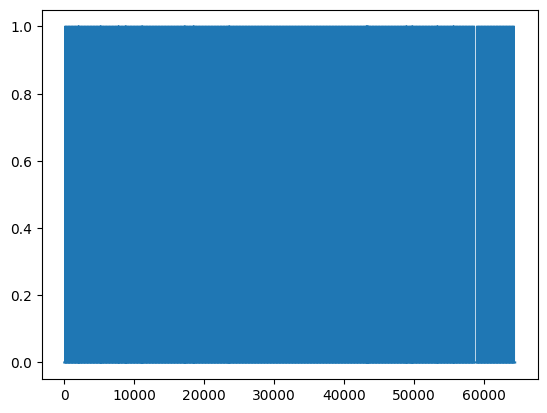

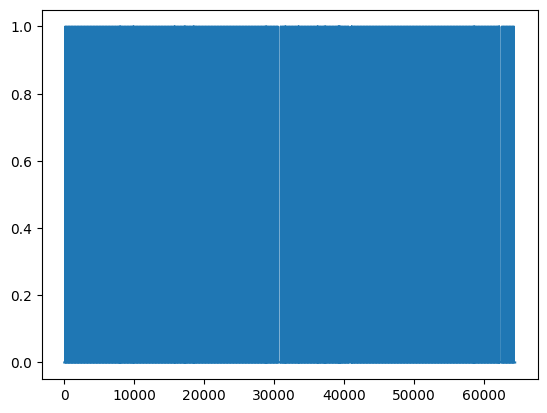

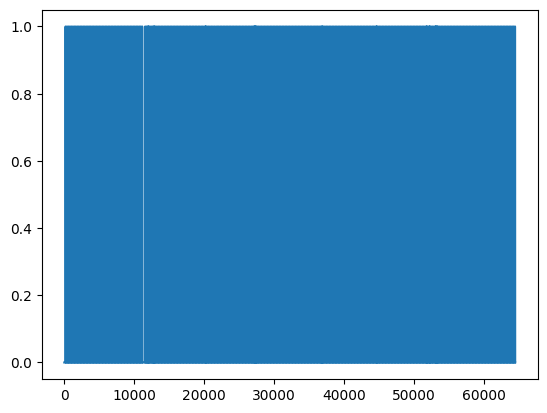

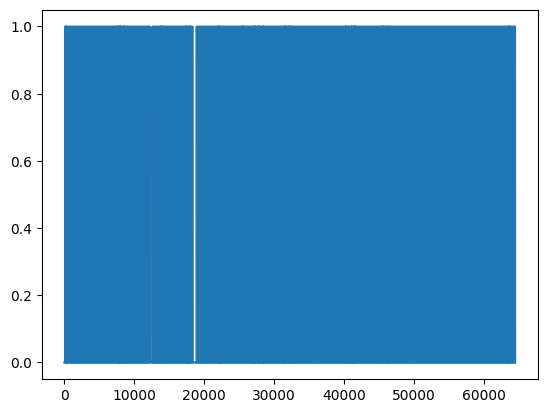

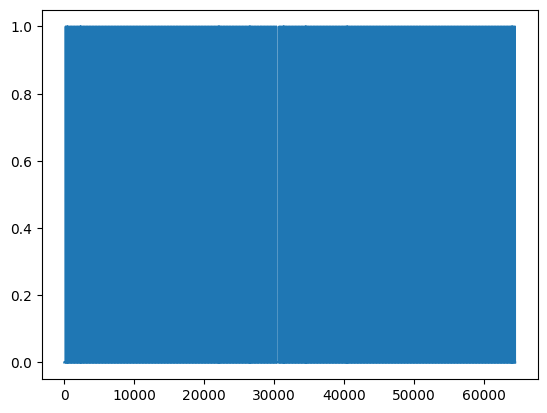

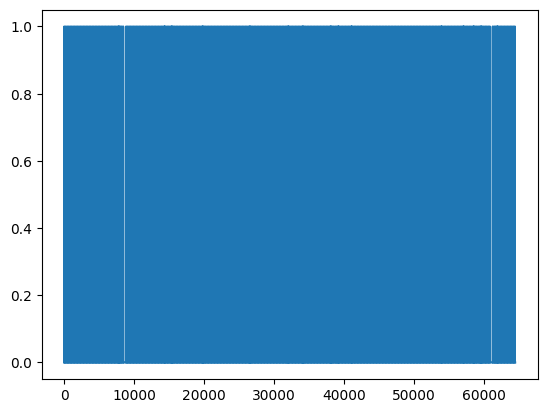

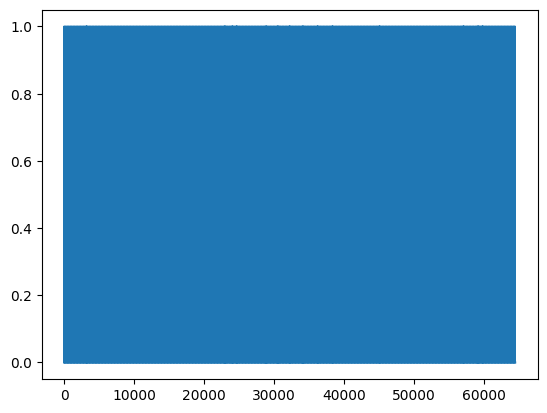

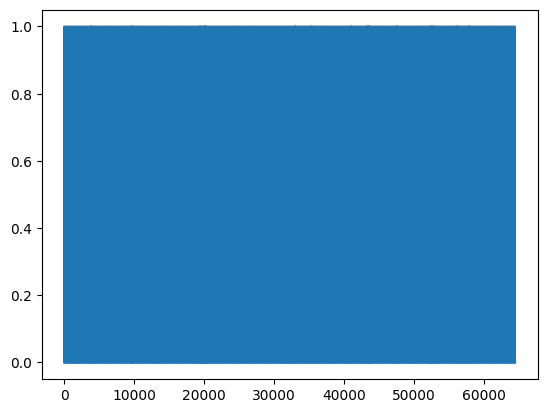

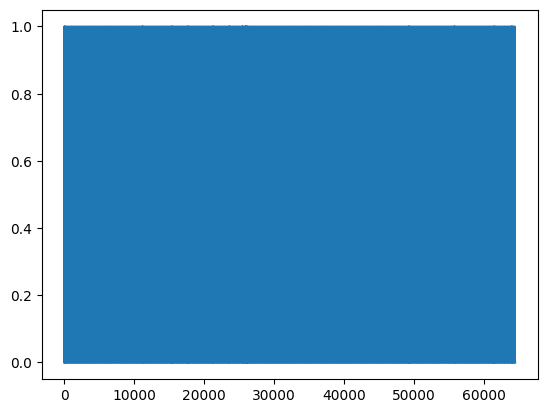

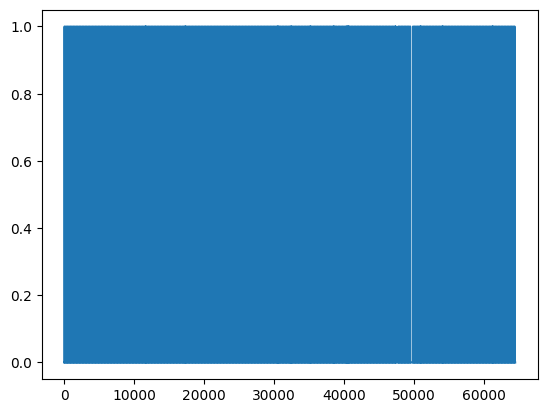

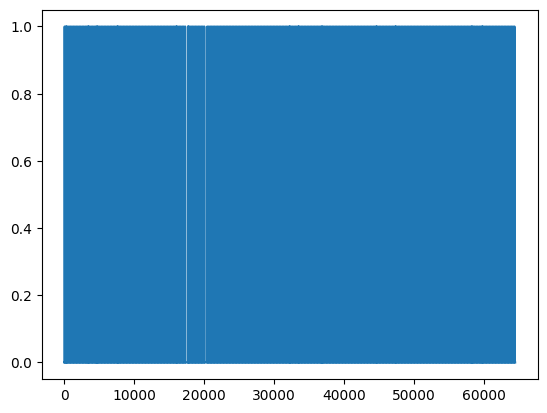

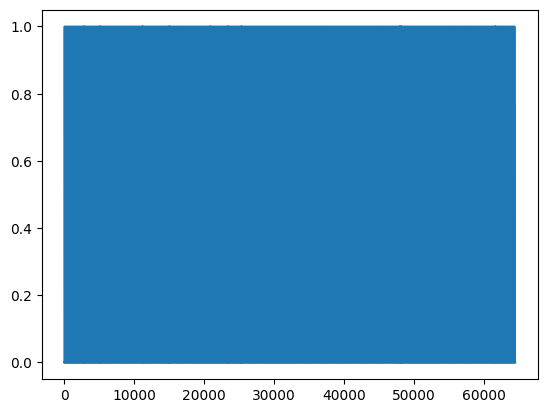

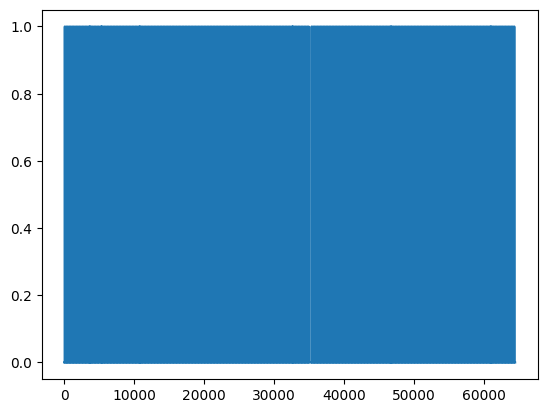

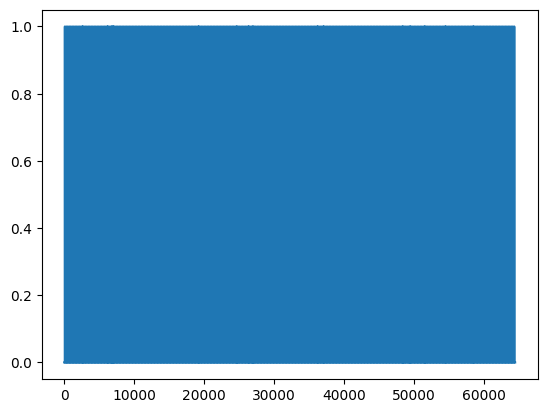

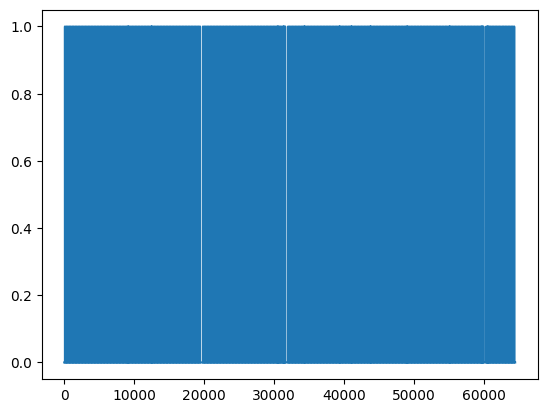

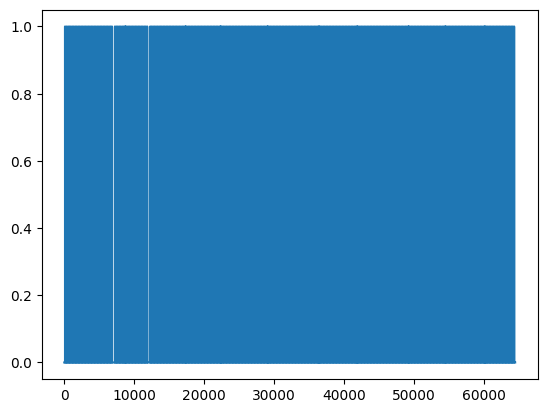

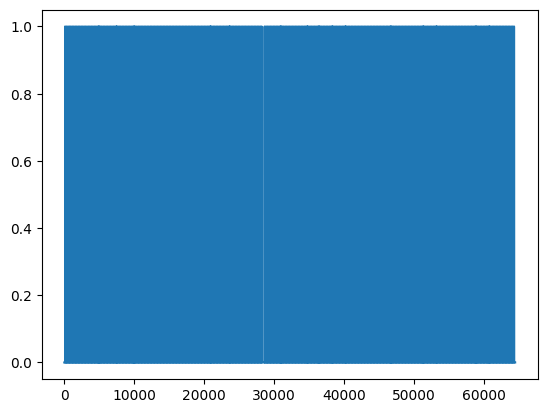

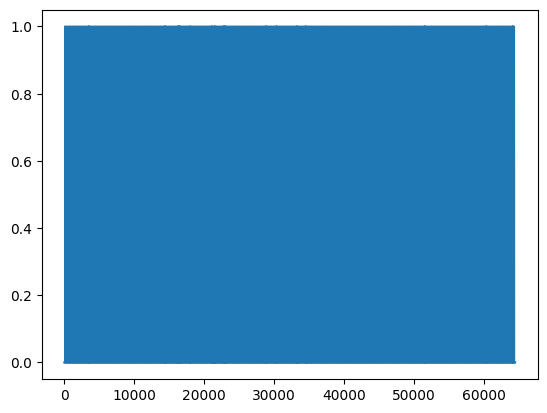

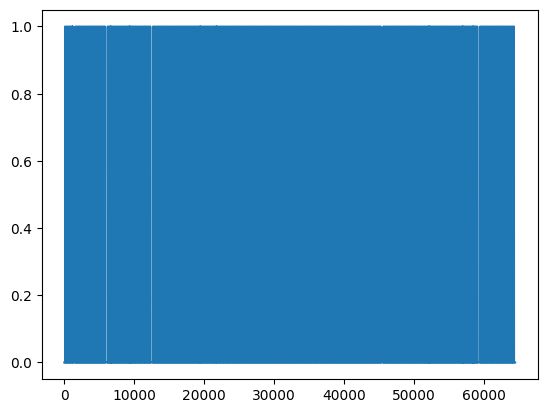

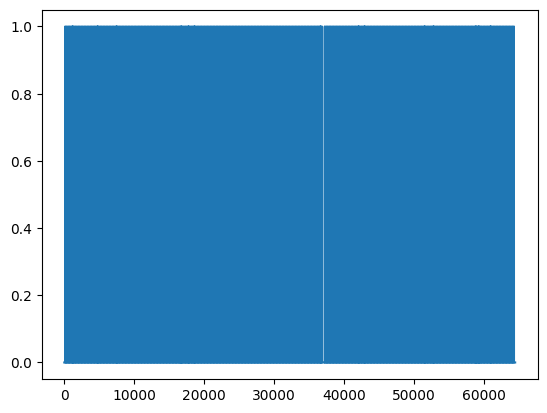

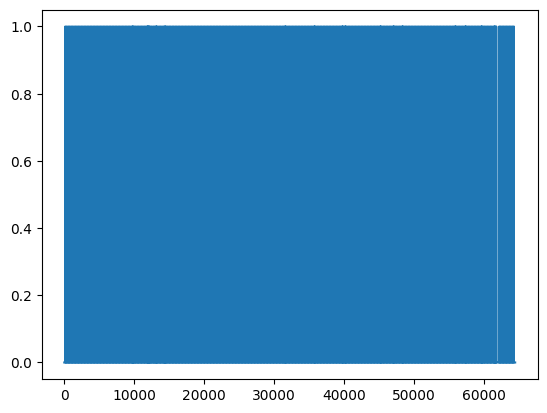

In [8]:
for a in clear_data:
    plt.figure()
    plt.plot(a)

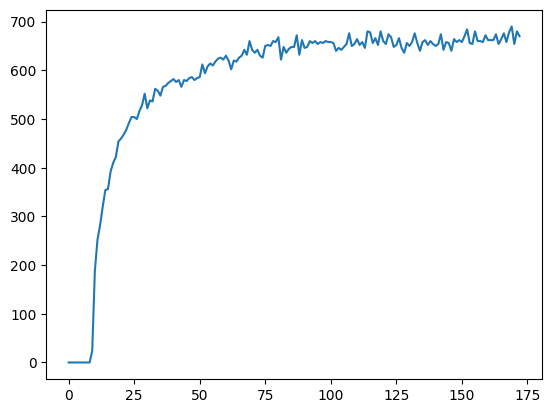

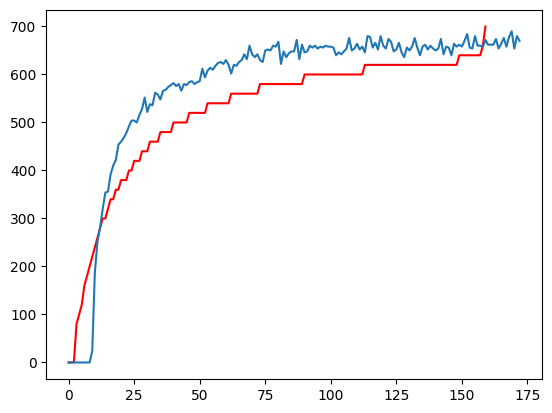

In [12]:
newd=[]
#calculate the frequency
for a in clear_data:
    newd.append(sum(a)*2)


x_axisval=np.arange(0,60,1.7)

plt.figure()
plt.plot(newd)

plt.figure()
sim=pd.read_csv("G:/Mi unidad/Escritorio/Pruebas/Finales/Curva sintonizacion/Analysis/plotvalues.csv")["Frequency"]
#plt.plot(x_axisval,newd)
plt.plot(sim,'r')
plt.plot(newd)

In [ ]:
sdf={"frequency":sim,"voltage":test_voltages}
nsdf=pd.DataFrame(sdf)
nsdf.to_csv("plotvalues_real_final.csv",index=False)

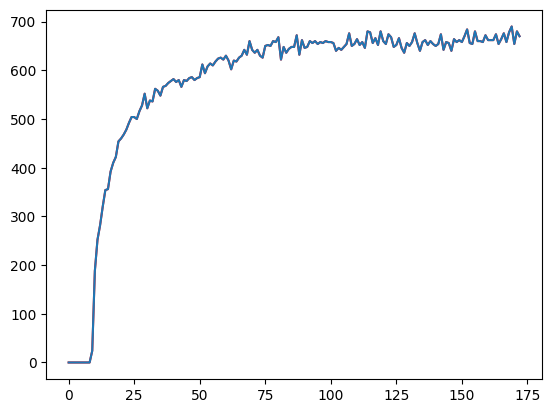

In [25]:
plt.figure()
sim=pd.read_csv("plotvalues_real_final.csv")["frequency"]
#plt.plot(x_axisval,newd)
plt.plot(sim,'r')
plt.plot(newd)

C:\Users\miles\AppData\Local\Temp\ipykernel_23644\791787117.py:15: RuntimeWarning: divide by zero encountered in log
  return ((140.5*np.log(x/0.09247)))


r2 score for the model with sim data is 0.802134065931787
r2 score for the model with real data is 0.8741342465664259


C:\Users\miles\AppData\Local\Temp\ipykernel_23644\791787117.py:15: RuntimeWarning: divide by zero encountered in log
  return ((140.5*np.log(x/0.09247)))


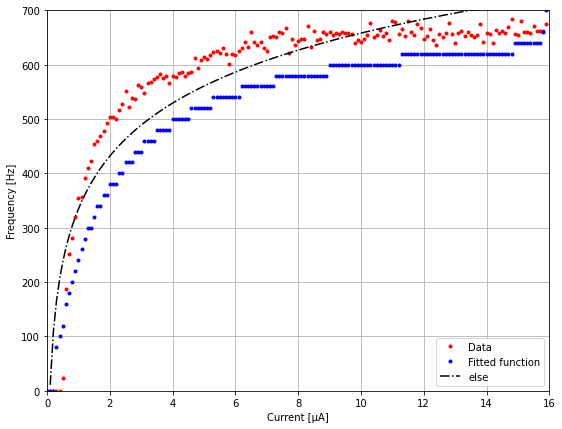

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,7))

sim=pd.read_csv("G:/Mi unidad/Escritorio/National instruments/Scripts/plotvalues_real_final.csv")["frequency"]
sims=pd.read_csv("G:/Mi unidad/Escritorio/Pruebas/Finales/Curva sintonizacion/Analysis/plotvalues.csv")["Frequency"]
x_axisval=np.arange(0,16,0.1)

def f(x):
    """
    Functions that aproximates the firing rate of the neuron
    """
    return ((140.5*np.log(x/0.09247)))
x = np.linspace(0, 16, 160)

plt.plot(x_axisval,sim[4:164],'.r')
plt.plot(x_axisval,sims,'.b')
plt.plot(x_axisval,f(x_axisval),'k-.')


plt.ylim([0, 700])
plt.xlim([0, 16])
plt.grid()
plt.xlabel("Current [\u03BCA]")
plt.ylabel("Frequency [Hz]")
plt.legend(["Data", "Fitted function","else"], loc ="lower right") 
plt.savefig("fitted function.svg")



from sklearn.metrics import r2_score
dfs=f(x_axisval)
dfs[0]=0
r2 = r2_score(sims, dfs)
print(f'r2 score for the model with sim data is {r2}') 
r2 = r2_score(sim, dfs)
print(f'r2 score for the model with real data is {r2}') 

